# Lab 2
## Student Names:
###              Jason Brown
###              MohammadAli Ezzati
## SMU ID:
###              Jason Brown: 48999280
## Date:
###               02/28/2024
## Class:
###             CS 8321-001-1242



## Description:
### The dataset chosen is an Amazon Review Dataset(2018). The file can be download from here: https://nijianmo.github.io/amazon/index.html
### The subset collected from the dataset focused on software reviews posted on Amazon. The filename on the website is Software_5.json.gz'. The dataset contained 128,05 reviews.
### The features of the dataset: overall, verified, reviewTime, reviewerID, asin, style, reviewerName, reviewText, summary, unixReviewTime, vote,	image.
### The classification task is sentiment analysis on reviews left to predict an overall rating.
### Evaluation we will be using R-2 score and confusion matrix

## Description of Foundational Model
#### The foundational model that we will be training on is a pre-trained model that was trained by using Bidirectional Encoder Representations and Transformers (BERT). The specific BERT model we are using is the “bert-base-uncase” model was created by Google, and it can be load from the transformer’s library import. The neat thing about this pre-trained model is that it does differentiate between upper-case and lower-case letters. <br> BERT transformer models come pre-trained using the English language and a masked language modeling (MLM) objective. The training data was a large corpus of English data like Wikipedia in a self-supervised fashion. It was pretrained using raw text only, with no human’s supervision. It can automatically generate inputs and labels from text. It was pretrained to have two objectives, Masked Language Modeling (MLM), and Next Sentence Prediction (NSP). MLM allows a model to learn bidirectional representations of sentences. Which is a nice feature to more accurately determine how sentiment is produced by sentence context and not the definition of a word alone. The are a few variations for the Bert models like case sensitive ones, larges one, small ones, multilingual, and even ones meant for word-masking. <br> Some key specifications for Bert models are that they consist of 12 transformer layers for the encoder, they have a hidden size of 76, and it uses 12 attention heads to allow it to work on different parts of the input sequence at once. <br> The bidirectional embeddings approach is ideal for NLP tasks as it allows it to capture rich contextual information for each token in a given sequence. Also, since it provides features that allow a developer to fine tune it on a downstream task like text classification.

## Splitting the Data
#### For the scratc model train_test_split was used. For training with BERT, train_test_split was used for splitting the data into training sentences and labesl, and test sentences and labels. The test sentences were then used to the validation sentences and labels, and holdout sentences and labels. <br>For another more advanced example of using BERT for classification, train_test_split was used to split the cleaned data into two separate training and testing datasets and the testing data was split into validation and testing set.

# Results <br> From Scratch Model: R-2 Accuracy: .99<br>Bert model doing classification using encoding  and tokenization. Accuracy: 65

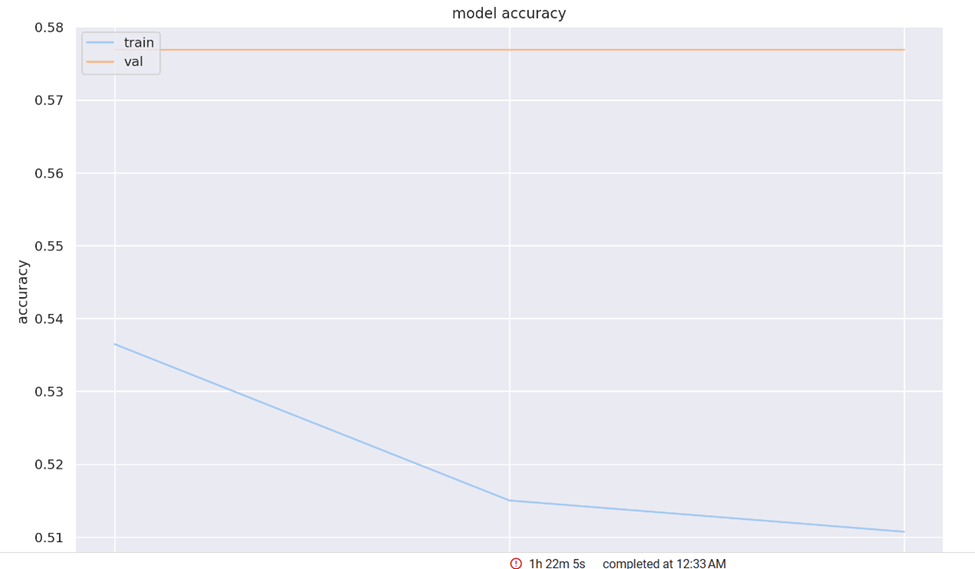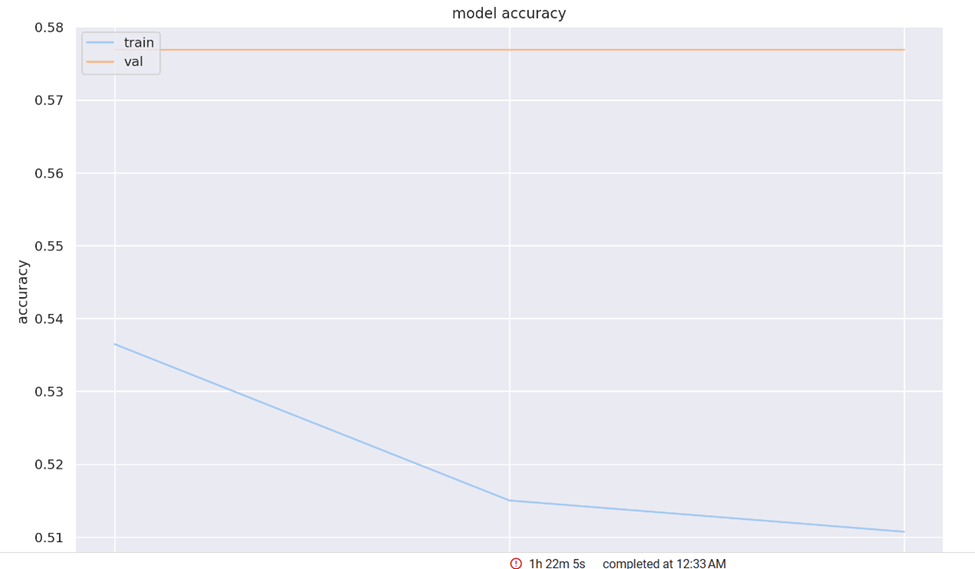

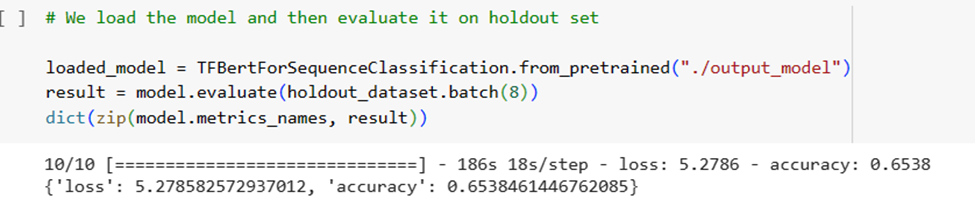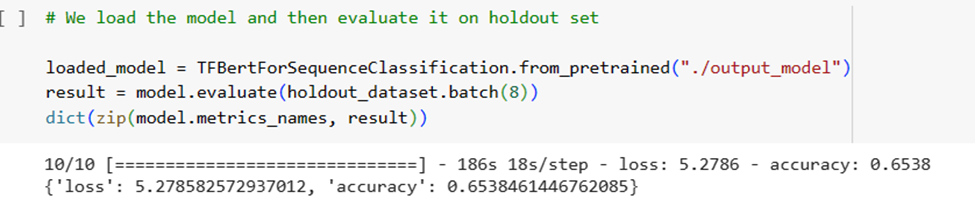

## Multiclass BERT model Results<br>
### Note the poor accuracy of just 20%, more time was needed for this models, also notice the poor training rate.


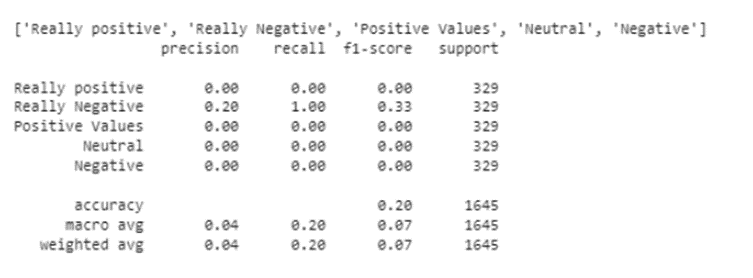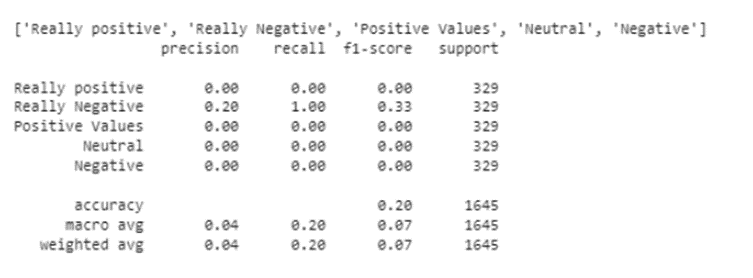

In [3]:
# !pip install fasttext

In [4]:

import csv
#import fasttext.util
import json
import os, json, gzip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
#import tensorflow.keras
import scipy as sp
#import tensorflow as tf
import platform
import pandas as pd
import nltk
import string
from time import time
from sklearn.feature_extraction.text import CountVectorizer # to create bag of words/ document-term matrix
from nltk.tokenize import word_tokenize # tokenizing the words
from nltk.corpus import stopwords # to remove stopwords
from six.moves import cPickle as pickle


%matplotlib inline
%config InlineBackend.figure_format='retina'

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Configure how graphs will show up in this notebook
%matplotlib inline
sns.set_context('notebook', rc={'figure.figsize': (10, 6)}, font_scale=1.5)

In [6]:
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('punkt')
# nltk.download('words')
# nltk.download('averaged_perceptron_tagger')
# from nltk.corpus import wordnet, stopwords
# print(f"Python Platform: {platform.platform()}")




In [7]:
#  %%time
# def load_embeddings(filename):
#     """
#     Load a DataFrame from the generalized text format used by word2vec, GloVe,
#     fastText, and ConceptNet Numberbatch. The main point where they differ is
#     whether there is an initial line with the dimensions of the matrix.
#     """
#     labels = []
#     rows = []
#     with open(filename, encoding='utf-8') as infile:
#         for i, line in enumerate(infile):
#             items = line.rstrip().split(' ')
#             if len(items) == 2:
#                 # This is a header row giving the shape of the matrix
#                 continue
#             labels.append(items[0])
#             values = np.array([float(x) for x in items[1:]], 'f')
#             rows.append(values)

#     arr = np.vstack(rows)
#     return pd.DataFrame(arr, index=labels, dtype='f')

# embeddings = load_embeddings('drive/My Drive/numberbatch-en.txt')
# embeddings.shape

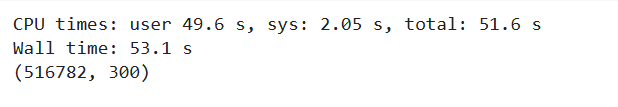

In [8]:
# def load_lexicon(filename):
#     """
#     Load a file from Bing Liu's sentiment lexicon
#     (https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html), containing
#     English words in Latin-1 encoding.

#     One file contains a list of positive words, and the other contains
#     a list of negative words. The files contain comment lines starting
#     with ';' and blank lines, which should be skipped.
#     """
#     lexicon = []
#     with open(filename, encoding='latin-1') as infile:
#         for line in infile:
#             line = line.rstrip()
#             if line and not line.startswith(';'):
#                 lexicon.append(line)
#     return lexicon

# pos_words = load_lexicon('drive/My Drive/positive-words.txt')
# neg_words = load_lexicon('drive/My Drive/negative-words.txt')

# print(len(pos_words), len(neg_words))

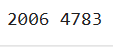

In [9]:
# pos_words_common = list(set(pos_words) & set(embeddings.index))
# neg_words_common = list(set(neg_words) & set(embeddings.index))

# pos_vectors = embeddings.loc[pos_words_common]
# neg_vectors = embeddings.loc[neg_words_common]
# print(pos_vectors.shape,neg_vectors.shape)

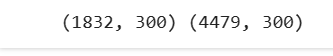

In [10]:
# vectors = pd.concat([pos_vectors, neg_vectors])
# targets = np.array([1 for entry in pos_vectors.index] + [-1 for entry in neg_vectors.index])
# labels = list(pos_vectors.index) + list(neg_vectors.index)

In [11]:
# from sklearn.model_selection import train_test_split
# train_vectors, test_vectors, train_targets, test_targets, train_labels, test_labels = \
#     train_test_split(vectors, targets, labels, test_size=0.1, random_state=0)

In [12]:
# # create a linear classifier
# from sklearn.linear_model import SGDClassifier
# from sklearn.metrics import accuracy_score
# model = SGDClassifier(loss='log_loss', random_state=0, max_iter=100)
# model.fit(train_vectors, train_targets)
# accuracy_score(model.predict(test_vectors), test_targets)

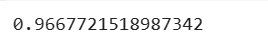

In [13]:
# def vecs_to_sentiment(vecs):
#     # predict_log_proba gives the log probability for each class
#     predictions = model.predict_log_proba(vecs)

#     # To see an overall positive vs. negative classification in one number,
#     # we take the log probability of positive sentiment minus the log
#     # probability of negative sentiment.
#     # this is a logarithm of the max margin for the classifier,
#     # similar to odds ratio (but not exact) log(p_1/p_0) = log(p_1)-log(p_0)
#     return predictions[:, 1] - predictions[:, 0]


# def words_to_sentiment(words):
#     vecs = embeddings.loc[words].dropna()
#     log_odds = vecs_to_sentiment(vecs)
#     return pd.DataFrame({'sentiment': log_odds}, index=vecs.index)


# # # Show 20 examples from the test set
# words_to_sentiment(test_labels).iloc[:20]

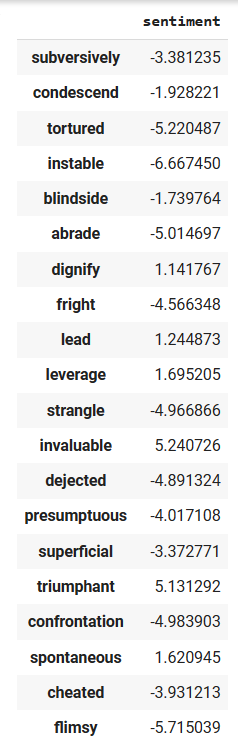

In [14]:
# import re
# TOKEN_RE = re.compile(r"\w.*?\b")
# # The regex above finds tokens that start with a word-like character (\w), and continues
# # matching characters (.+?) until the next word break (\b). It's a relatively simple
# # expression that manages to extract something very much like words from text.


# def text_to_sentiment(text):
#     # tokenize the input phrase
#     tokens2 = []
#     tokens = [token.casefold() for token in TOKEN_RE.findall(text)]
#     for token in tokens:
#         if token in embeddings.index:
#             tokens2.append(token)
#     # send each token separately into the embedding, then the classifier
#     sentiments = words_to_sentiment(tokens2)
#     return sentiments['sentiment'].mean() # return the mean for the classifier

## Read File IN

In [15]:
# DATASET_NAME = 'drive/My Drive/Software_5.json.gz'
# #DATASET_NAME = 'Software_5.json.gz'

In [16]:
# def parse(path):
#   g = gzip.open(path, 'rb')
#   for l in g:
#     yield json.loads(l)

# def getDF(path):
#   i = 0
#   df = {}
#   for d in parse(path):
#     df[i] = d
#     i += 1
#   return pd.DataFrame.from_dict(df, orient='index')

# #removes extensions and adds pickle.
# pickle_file_name = (DATASET_NAME[:-8]+'.pickle')

# #loads pickle if exists, extracts and pickles if it doesn't
# if os.path.exists(pickle_file_name):
#     print ('Pickled file already present, loading...')
#     data = pd.read_pickle(pickle_file_name)
#     print ('Pickle file loaded.')
# else:
#     data = getDF(DATASET_NAME)
#     data.to_pickle(pickle_file_name)

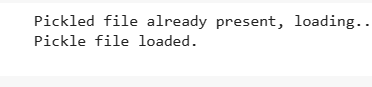

In [17]:
### Preview Data

In [18]:
# data.head(1)

In [19]:
### Drop unnecesary columns

In [20]:
# data = data.drop(['verified', 'reviewTime', 'reviewerID', 'asin', 'style', 'reviewerName', 'unixReviewTime', 'image'], axis=1)
# data = data.dropna()
# data.head()

In [21]:
# data.head()

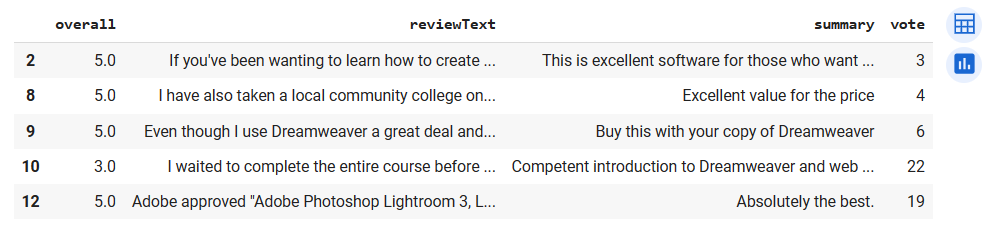

In [22]:
### Clean up data, ie. remove punctuation, convert to lowercase

In [23]:
# #convert text to lowercase
# data.loc[:, 'reviewText'] = data['reviewText'].str.lower()

# def remove_punctuation(text):
#     return text.translate(str.maketrans('','',string.punctuation))

# data['reviewText']=data['reviewText'].apply( lambda x: remove_punctuation(x))
# data['reviewText'].head(4)

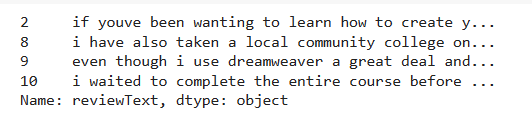

In [24]:
# convert text to lowercase
# data.loc[:, 'summary'] = data['summary'].str.lower()

# def remove_punctuation(text):
#     return text.translate(str.maketrans('','',string.punctuation))

# data['summary']=data['summary'].apply( lambda x: remove_punctuation(x))
# data['summary'].head(4)

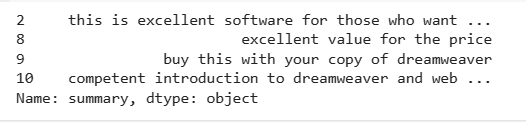

In [25]:
# data.head()

In [26]:
# review_txt = pd.DataFrame(data['reviewText'])
# review_txt.head(1)['reviewText'].values

In [27]:
# data['reviewText'].describe

### Restratify overall column as either 0 for negative score and 1 for positive

In [28]:
# def restratify_overall_col(text):
#   if(int(text) > 3):
#     return 1
#   else:
#     return 0

# data['overall']=data['overall'].apply( lambda x: restratify_overall_col(x))

### Distribution of results in the overall column.

In [29]:
# overall_bars = data['overall'].value_counts()
# overall_bars

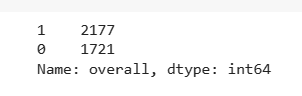

In [30]:
# categories=['Positive', 'Negative']
# c = ['red', 'orange']
# # Plotting a basic histogram

# plt.bar(categories, overall_bars, color=c, edgecolor='black')

# # Adding labels and title
# plt.xlabel('Values')
# plt.ylabel('Frequency')
# plt.title('Basic Histogram')

# # Display the plot
# plt.show()

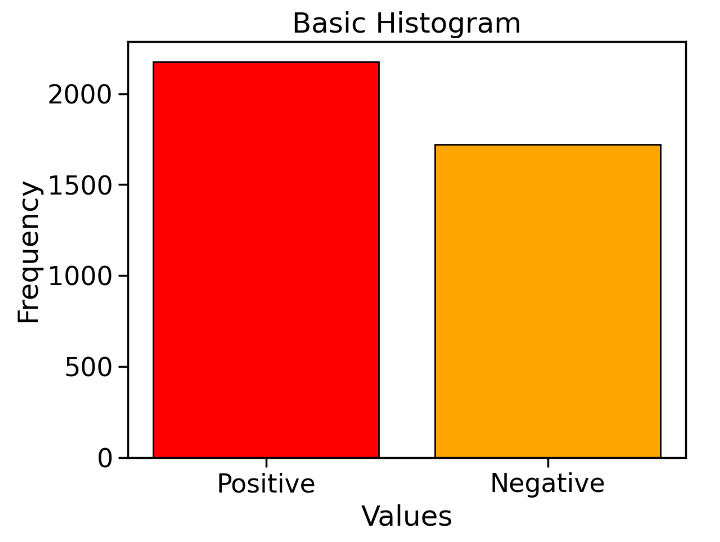

### It can be seen that the classes are very imbalanced, so we reduced the sample size for each overall value.

In [31]:
# sample_size = 329
# df_equal_overall = pd.DataFrame()
# for i in data.overall.unique():
#   X = data[data.overall == i].sample(sample_size)
#   #df_equal_overall = df_equal_overall.append(X)
#   #df_equal_overall.loc[len(df_equal_overall)] = X # only use with a RangeIndex!
#   df_equal_overall = pd.concat([df_equal_overall, X], ignore_index=True)

In [32]:
# df_equal_overall.head()

### Clean up the data some more by removing non-alphanumeric values, removing stopwords and splitting into a list.

In [33]:
# stopwords_list = stopwords.words('english')

# def ReviewProcessing(df):
#   # remove non alphanumeric
#   df['review_cleaned'] = df.reviewText.str.replace('[^a-zA-Z0-9 ]', '')
#   df['summary_cleaned'] = df.summary.str.replace('[^a-zA-Z0-9 ]', '')
#    # split into list
#   df.review_cleaned = df.review_cleaned.str.split(' ')
#   df.summary_cleaned = df.summary_cleaned.str.split(' ')
#   # remove stopwords
#   df.review_cleaned = df.review_cleaned.apply(lambda x: [item for item in x if item not in stopwords_list])
#   df.summary_cleaned = df.summary_cleaned.apply(lambda x: [item for item in x if item not in stopwords_list])

#   return df

### Following function get_wordnet_pos would map the treebank tags to WordNet part of speech names and return lemmatized parts of speech

In [34]:
# def get_wordnet_pos(word):
#   tag = nltk.pos_tag([word])[0][1][0].upper()
#   tag_dict = {"J": wordnet.ADJ,
#                 "N": wordnet.NOUN,
#                 "V": wordnet.VERB,
#                 "R": wordnet.ADV}

#   return tag_dict.get(tag, wordnet.NOUN)

# lemmatizer = nltk.stem.WordNetLemmatizer()
# def get_lemmatize(sent):
#   return " ".join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sent)])


### Save lemmatized parts of speech results

In [35]:
# clean_data = ReviewProcessing(data)
# clean_data.review_cleaned = clean_data.review_cleaned.apply(' '.join)
# clean_data['review_cleaned_lemmatized'] = clean_data.review_cleaned.apply(get_lemmatize)
# clean_data.summary_cleaned = clean_data.summary_cleaned.apply(' '.join)
# clean_data['summary_cleaned_lemmatized'] = clean_data.summary_cleaned.apply(get_lemmatize)

In [36]:
# clean_data.to_csv('drive/My Drive/cleaned_data2.csv')

In [37]:
# clean_data = pd.read_csv('drive/My Drive/cleaned_data2.csv')

### Compare original results to cleaned and lemmatized results

In [38]:
# clean_data.head()

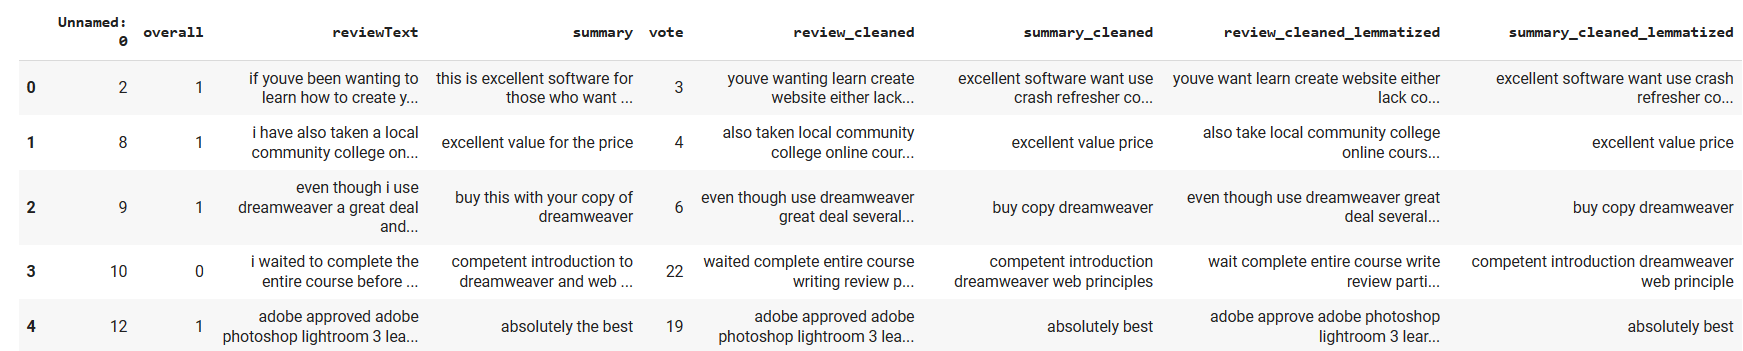

In [39]:
# clean_data.head()

In [40]:
# clean_data.shape

In [41]:
# clean_data = clean_data.drop(['reviewText', 'review_cleaned', 'summary', 'summary_cleaned'], axis=1)
# clean_data

In [42]:
# overall_bars = clean_data['overall'].value_counts()
# overall_bars

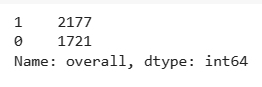

In [43]:
# categories=['Positive', 'Negative']
# c = ['red', 'orange']
# # Plotting a basic histogram

# plt.bar(categories, overall_bars, color=c, edgecolor='black')

# # Adding labels and title
# plt.xlabel('Values')
# plt.ylabel('Frequency')
# plt.title('Basic Histogram')

# # Display the plot
# plt.show()

In [44]:
# nltk.download('averaged_perceptron_tagger')

In [45]:
# lst1 = []
# for i in clean_data['review_cleaned_lemmatized']:

#   try:
#     lst1.append(text_to_sentiment(i))
#   except:
#     lst1.append(0)
#     continue

# clean_data['review_sentiment_score'] = lst1

In [46]:
# lst1 = []
# for i in clean_data['summary_cleaned_lemmatized']:

#   try:
#     lst1.append(text_to_sentiment(i))
#   except:
#     lst1.append(0)
#     continue

# clean_data['summary_sentiment_score'] = lst1

In [47]:
# clean_data.to_csv('drive/My Drive/cleaned_data3.csv')

In [48]:
clean_data = pd.read_csv('drive/My Drive/cleaned_data3.csv')

In [49]:
clean_data

Unnamed: 0.1  Unnamed: 0  overall  \
0                0           2        1   
1                1           8        1   
2                2           9        1   
3                3          10        0   
4                4          12        1   
...            ...         ...      ...   
3893          3893       12747        1   
3894          3894       12767        1   
3895          3895       12768        0   
3896          3896       12797        1   
3897          3897       12798        1   

                                             reviewText  \
0     if youve been wanting to learn how to create y...   
1     i have also taken a local community college on...   
2     even though i use dreamweaver a great deal and...   
3     i waited to complete the entire course before ...   
4     adobe approved adobe photoshop lightroom 3 lea...   
...                                                 ...   
3893  there are a couple things i would like to see ...   
3894  35 stars i got this software for basic book ke...   
3895  the newest trend in software is to sell you a ...   
3896  when you get started and you eard of lightroom...   
3897  i feel like this software is a good balance of...   

                                                summary vote  \
0     this is excellent software for those who want ...    3   
1                         excellent value for the price    4   
2                buy this with your copy of dreamweaver    6   
3     competent introduction to dreamweaver and web ...   22   
4                                   absolutely the best   19   
...                                                 ...  ...   
3893               defrag seems to speed up my computer    4   
3894  let me start by admitting that i do not have a...    3   
3895    subscription based you do not own this software   16   
3896  very nice read the manual to get everything ou...    2   
3897  great workflow and balance of power and simpli...    7   

                                         review_cleaned  \
0     youve wanting learn create website either lack...   
1     also taken local community college online cour...   
2     even though use dreamweaver great deal several...   
3     waited complete entire course writing review p...   
4     adobe approved adobe photoshop lightroom 3 lea...   
...                                                 ...   
3893  couple things would like see large files moved...   
3894  35 stars got software basic book keeping whole...   
3895  newest trend software sell subscription rather...   
3896  get started eard lightroom know go around lr c...   
3897  feel like software good balance power simplici...   

                                        summary_cleaned  \
0     excellent software want use crash refresher co...   
1                                 excellent value price   
2                                  buy copy dreamweaver   
3     competent introduction dreamweaver web principles   
4                                       absolutely best   
...                                                 ...   
3893                        defrag seems speed computer   
3894  let start admitting background accounting soft...   
3895                        subscription based software   
3896                    nice read manual get everything   
3897            great workflow balance power simplicity   

                              review_cleaned_lemmatized  \
0     youve want learn create website either lack co...   
1     also take local community college online cours...   
2     even though use dreamweaver great deal several...   
3     wait complete entire course write review parti...   
4     adobe approve adobe photoshop lightroom 3 lear...   
...                                                 ...   
3893  couple thing would like see large file move ou...   
3894  35 star get software basic book keep whole lot...   
3895  new trend software sell subscription rather pi...   
389

### Collecting samples string for later.

In [50]:
string1 = clean_data['summary_cleaned'][0]

In [51]:
string2 = clean_data.iloc[1640]['review_cleaned_lemmatized']
string2

'thanks raters wont use turbotax cant rate product want another 1 star add like someone else say able give zero star turbotax people must nut 10 extra charge return bad enough really make angry theyre try hide average user buy pay extra money would easy return software sneaky dont know dont forget thing like'

In [52]:
string3 = clean_data['reviewText'][3]
string3

'i waited to complete the entire course before writing this review and in no particular order these are my observations\n\ni should tell you that my web skills are limited i used front page for years and have created several very elementary dreamweaver sites for family members im in the process of trying to work more professionally cleaner less and better code and more creatively a less stilted and more unique and appealing design this course doesnt purport to be a web design course it assumes that you already have a basic idea for a relatively simple website and its going to teach you how to implement it dont expect inspiration\n\npositive\n level absolute beginner to intermediate\n  it is entirely dvdbased the booklet 106 pages including index that comes with the dvd just provides additional random information it is in no way connected to the content or the sequence of the course\n the scope of the information presented is all that is needed for basic competence in the implementation

# The below code removes the rows where the sentiment score is positive but the review was negative and vice versa. Uncomment to see the difference.

In [53]:
d_pos_data = clean_data[(clean_data['review_sentiment_score']<0) & (clean_data['overall'] == 1)]
d_neg_data = clean_data[(clean_data['review_sentiment_score']>0) & (clean_data['overall'] == 0)]
d_pos_data2 = clean_data[(clean_data['summary_sentiment_score']<0) & (clean_data['overall'] == 1)]
d_neg_data2 = clean_data[(clean_data['summary_sentiment_score']>0) & (clean_data['overall'] == 0)]

In [54]:
d_pos_data = pd.DataFrame(d_pos_data)
d_neg_data = pd.DataFrame(d_neg_data)
d_neg_data2 = pd.DataFrame(d_neg_data2)
d_pos_data2 = pd.DataFrame(d_pos_data2)

In [55]:
new_data = pd.concat([d_pos_data, d_neg_data, d_pos_data2, d_neg_data2])
len(new_data)

2332

## Drop the mislabeled rows

In [56]:
new_data = clean_data.drop(new_data.index)

## View our new data

In [57]:
new_data

Unnamed: 0.1  Unnamed: 0  overall  \
0                0           2        1   
1                1           8        1   
4                4          12        1   
6                6          23        0   
8                8          26        1   
...            ...         ...      ...   
3886          3886       12512        1   
3887          3887       12556        1   
3889          3889       12648        1   
3890          3890       12683        0   
3897          3897       12798        1   

                                             reviewText  \
0     if youve been wanting to learn how to create y...   
1     i have also taken a local community college on...   
4     adobe approved adobe photoshop lightroom 3 lea...   
6     been using office for over twenty years  still...   
8     this is really a great buy  it breaks down to ...   
...                                                 ...   
3886  twenty years ago i taught architectural design...   
3887  autocad 2012 is the reference standard drawing...   
3889  div idvideoblockr270oeq84gdj9c classasection a...   
3890  for software where you can pick up free versio...   
3897  i feel like this software is a good balance of...   

                                                summary vote  \
0     this is excellent software for those who want ...    3   
1                         excellent value for the price    4   
4                                   absolutely the best   19   
6         and easily corrupted outlook is all messed up    2   
8                                       excellent value    2   
...                                                 ...  ...   
3886                                  very good program    2   
3887                       outstanding drawing software    4   
3889                                   see it in action    3   
3890                    pricey and it installed spyware    2   
3897  great workflow and balance of power and simpli...    7   

                                         review_cleaned  \
0     youve wanting learn create website either lack...   
1     also taken local community college online cour...   
4     adobe approved adobe photoshop lightroom 3 lea...   
6     using office twenty years  still worth money  ...   
8     really great buy  breaks full ms office softwa...   
...                                                 ...   
3886  twenty years ago taught architectural design h...   
3887  autocad 2012 reference standard drawing softwa...   
3889  div idvideoblockr270oeq84gdj9c classasection a...   
3890  software pick free versions like 7zip im surpr...   
3897  feel like software good balance power simplici...   

                                        summary_cleaned  \
0     excellent software want use crash refresher co...   
1                                 excellent value price   
4                                       absolutely best   
6                       easily corrupted outlook messed   
8                                       excellent value   
...                                                 ...   
3886                                       good program   
3887                       outstanding drawing software   
3889                                         see action   
3890                           pricey installed spyware   
3897            great workflow balance power simplicity   

                              review_cleaned_lemmatized  \
0     youve want learn create website either lack co...   
1     also take local community college online cours...   
4     adobe approve adobe photoshop lightroom 3 lear...   
6     use office twenty year still worth money buggy...   
8     really great buy break full m office software ...   
...                                                 ...   
3886  twenty year ago taught architectural design hi...   
3887  autocad 2012 reference standard draw software ...   
3889  div idvideoblockr270oeq84gdj9c classasection a...   
389

## Check the balance in results

In [58]:
overall_bars = new_data['overall'].value_counts()
overall_bars

1    1231
0     801
Name: overall, dtype: int64

## Correct imbalance with sampling

In [59]:
sample_size = min(overall_bars)
df_equal_overall = pd.DataFrame()
for i in new_data.overall.unique():
  X = new_data[new_data.overall == i].sample(sample_size)
  #df_equal_overall = df_equal_overall.append(X)
  #df_equal_overall.loc[len(df_equal_overall)] = X # only use with a RangeIndex!
  df_equal_overall = pd.concat([df_equal_overall, X], ignore_index=True)

In [60]:
#overall_bars = df_equal_overall['overall'].value_counts()
overall_bars = df_equal_overall['overall'].value_counts()
overall_bars

1    801
0    801
Name: overall, dtype: int64

## Now everything is balanced

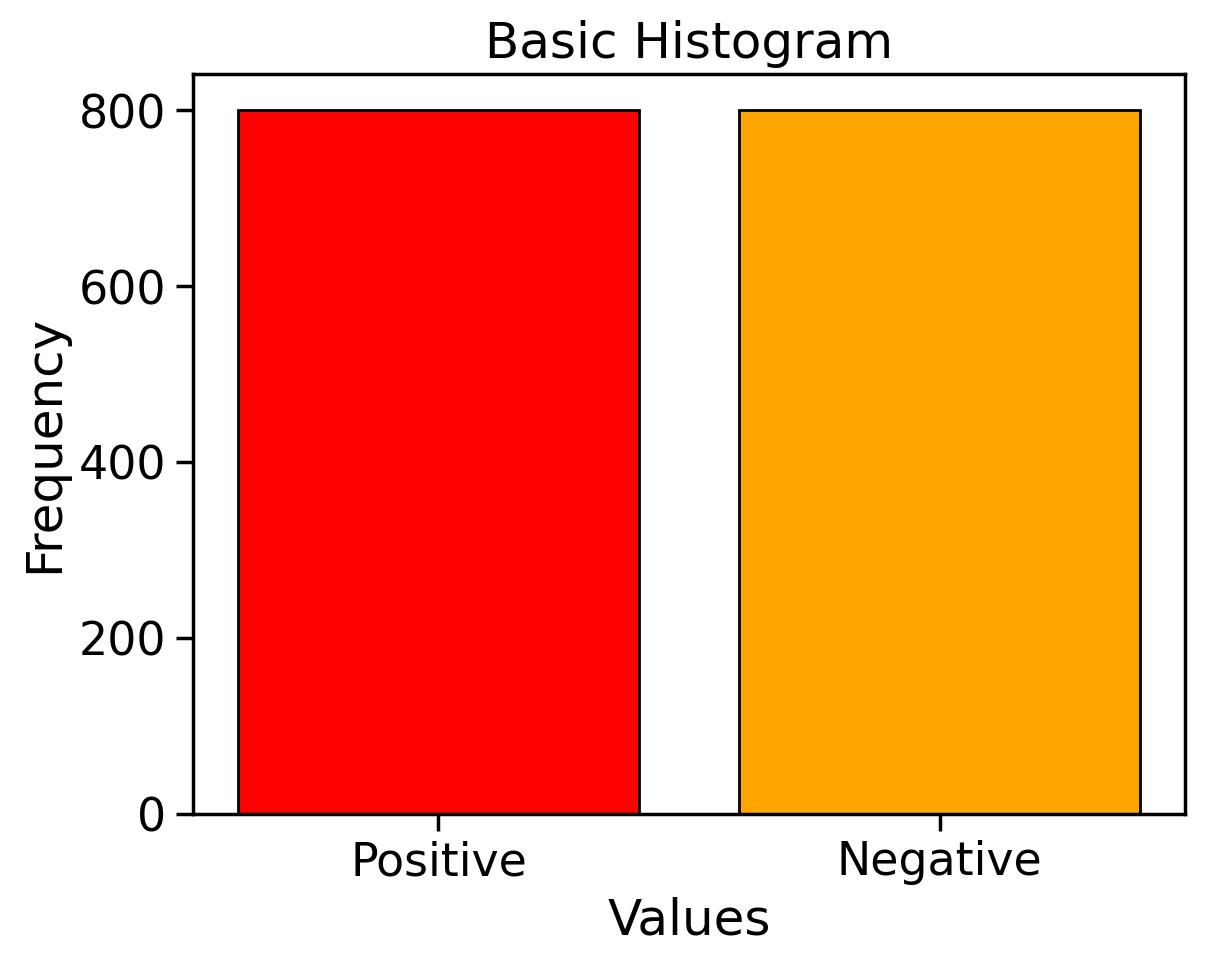

In [61]:
categories=['Positive', 'Negative']
c = ['red', 'orange']
# Plotting a basic histogram

plt.bar(categories, overall_bars, color=c, edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')

# Display the plot
plt.show()

Prepare data for softmax results, this will allow to expand for multi-label classification

In [62]:
new_data['overall'] = new_data['overall'].astype(int)
overall_dummies = pd.get_dummies(new_data['overall'])
for column in overall_dummies.columns:
    new_data[column] = overall_dummies[column]
#clean_data = clean_data.drop(columns= ['overall'])
new_data.head()

Unnamed: 0.1  Unnamed: 0  overall  \
0             0           2        1   
1             1           8        1   
4             4          12        1   
6             6          23        0   
8             8          26        1   

                                          reviewText  \
0  if youve been wanting to learn how to create y...   
1  i have also taken a local community college on...   
4  adobe approved adobe photoshop lightroom 3 lea...   
6  been using office for over twenty years  still...   
8  this is really a great buy  it breaks down to ...   

                                             summary vote  \
0  this is excellent software for those who want ...    3   
1                      excellent value for the price    4   
4                                absolutely the best   19   
6      and easily corrupted outlook is all messed up    2   
8                                    excellent value    2   

                                      review_cleaned  \
0  youve wanting learn create website either lack...   
1  also taken local community college online cour...   
4  adobe approved adobe photoshop lightroom 3 lea...   
6  using office twenty years  still worth money  ...   
8  really great buy  breaks full ms office softwa...   

                                     summary_cleaned  \
0  excellent software want use crash refresher co...   
1                              excellent value price   
4                                    absolutely best   
6                    easily corrupted outlook messed   
8                                    excellent value   

                           review_cleaned_lemmatized  \
0  youve want learn create website either lack co...   
1  also take local community college online cours...   
4  adobe approve adobe photoshop lightroom 3 lear...   
6  use office twenty year still worth money buggy...   
8  really great buy break full m office software ...   

                          summary_cleaned_lemmatized  review_sentiment_score  \
0  excellent software want use crash refresher co...                0.389968   
1                              excellent value price                0.624767   
4                                    absolutely best                0.422459   
6                        easily corrupt outlook mess               -0.381491   
8                                    excellent value                0.301054   

   summary_sentiment_score  0  1  
0                 0.203703  0  1  
1                 3.307394  0  1  
4                 4.428110  0  1  
6                -1.977415  1  0  
8                 5.302648  0  1

In [63]:
# len(new_data)

One last cleaning of data

In [64]:
# df_equal_overall = df_equal_overall.drop(['overall','review_cleaned', 'summary_cleaned','reviewText', 'summary','review_cleaned_lemmatized', 'summary_cleaned_lemmatized','Unnamed: 0'], axis=1)
# df_equal_overall
df_equal_overall = new_data.drop(['overall','review_cleaned', 'summary_cleaned','reviewText', 'summary','review_cleaned_lemmatized', 'summary_cleaned_lemmatized','Unnamed: 0'], axis=1)
df_equal_overall

Unnamed: 0.1 vote  review_sentiment_score  summary_sentiment_score  0  1
0                0    3                0.389968                 0.203703  0  1
1                1    4                0.624767                 3.307394  0  1
4                4   19                0.422459                 4.428110  0  1
6                6    2               -0.381491                -1.977415  1  0
8                8    2                0.301054                 5.302648  0  1
...            ...  ...                     ...                      ... .. ..
3886          3886    2                0.313819                 3.845329  0  1
3887          3887    4                0.372366                 2.418792  0  1
3889          3889    3                0.273092                 0.191574  0  1
3890          3890    2               -0.389174                -1.115392  1  0
3897          3897    7                0.184332                 2.772202  0  1

[2032 rows x 6 columns]

In [65]:
# df_equal_overall = df_equal_overall.drop(['summary_sentiment_score'], axis=1)
# df_equal_overall

In [66]:
# df_equal_overall = df_equal_overall.drop(['vote'], axis=1)
# df_equal_overall

## View final data results for from scratch model.

In [67]:
df_equal_overall = df_equal_overall.drop(['Unnamed: 0.1'], axis=1)
df_equal_overall

vote  review_sentiment_score  summary_sentiment_score  0  1
0       3                0.389968                 0.203703  0  1
1       4                0.624767                 3.307394  0  1
4      19                0.422459                 4.428110  0  1
6       2               -0.381491                -1.977415  1  0
8       2                0.301054                 5.302648  0  1
...   ...                     ...                      ... .. ..
3886    2                0.313819                 3.845329  0  1
3887    4                0.372366                 2.418792  0  1
3889    3                0.273092                 0.191574  0  1
3890    2               -0.389174                -1.115392  1  0
3897    7                0.184332                 2.772202  0  1

[2032 rows x 5 columns]

In [68]:
df_equal_overall['vote'] = df_equal_overall['vote'].replace(',', '', regex=True).astype(int)
df_equal_overall['vote'] = df_equal_overall['vote'].astype(int)
df_equal_overall

vote  review_sentiment_score  summary_sentiment_score  0  1
0        3                0.389968                 0.203703  0  1
1        4                0.624767                 3.307394  0  1
4       19                0.422459                 4.428110  0  1
6        2               -0.381491                -1.977415  1  0
8        2                0.301054                 5.302648  0  1
...    ...                     ...                      ... .. ..
3886     2                0.313819                 3.845329  0  1
3887     4                0.372366                 2.418792  0  1
3889     3                0.273092                 0.191574  0  1
3890     2               -0.389174                -1.115392  1  0
3897     7                0.184332                 2.772202  0  1

[2032 rows x 5 columns]

## Create our input and output columns for our from scratch model

In [69]:
inp_columns = df_equal_overall.columns.tolist()
inp_columns.remove(0)
inp_columns.remove(1)
# inp_columns.remove(2)
# inp_columns.remove(3)
# inp_columns.remove(4)
out_columns = [0,1]

In [70]:
df_equal_overall

vote  review_sentiment_score  summary_sentiment_score  0  1
0        3                0.389968                 0.203703  0  1
1        4                0.624767                 3.307394  0  1
4       19                0.422459                 4.428110  0  1
6        2               -0.381491                -1.977415  1  0
8        2                0.301054                 5.302648  0  1
...    ...                     ...                      ... .. ..
3886     2                0.313819                 3.845329  0  1
3887     4                0.372366                 2.418792  0  1
3889     3                0.273092                 0.191574  0  1
3890     2               -0.389174                -1.115392  1  0
3897     7                0.184332                 2.772202  0  1

[2032 rows x 5 columns]

In [71]:
from sklearn.model_selection import train_test_split

Distribute training and testing data for neural network from scratch

In [72]:
train_df, val_test_df = train_test_split(df_equal_overall, test_size = 0.2)
val_df, test_df = train_test_split(val_test_df, test_size = 0.5)

In [73]:
Xtrain, ytrain = np.array(train_df[inp_columns]), np.array(train_df[out_columns])

Xval, yval = np.array(val_df[inp_columns]), np.array(val_df[out_columns])

Xtest, ytest = np.array(test_df[inp_columns]), np.array(test_df[out_columns])

Standardize our data

In [74]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

Xtrain = std.fit_transform(Xtrain)
Xval = std.transform(Xval)
Xtest = std.transform(Xtest)

In [75]:
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

## Define our from scratch's model layers

In [76]:


model = models.Sequential([
    #layers.Dense(8, activation = 'relu', input_shape = (Xtrain[0].shape[0],)),
    #layers.Dense(16, activation = 'relu', input_shape = (Xtrain[0].shape[0],)),
    #layers.BatchNormalization(),
    #layers.Dropout(0.5),
    #layers.Dropout(0.2),
    layers.Dense(16, activation = 'relu', input_shape = (Xtrain[0].shape[0],)),
    # layers.BatchNormalization(),
    #layers.Dropout(0.2),
    layers.Dense(2, activation = 'softmax', input_shape = (Xtrain[0].shape[0],)),
    ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [77]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 98 (392.00 B)

 Trainable params: 98 (392.00 B)

 Non-trainable params: 0 (0.00 B)

In [78]:
from tensorflow.keras import models, optimizers, losses, layers, callbacks

Compile our from scratch model

In [79]:

model.compile(loss=losses.CategoricalCrossentropy(),optimizer = optimizers.SGD(0.5),metrics = ['accuracy'])

history = model.fit(Xtrain, ytrain, validation_data = (Xval, yval), epochs = 100)

Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9367 - loss: 0.2202 - val_accuracy: 1.0000 - val_loss: 0.0274
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9975 - loss: 0.0242 - val_accuracy: 1.0000 - val_loss: 0.0129
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9972 - loss: 0.0180 - val_accuracy: 0.9951 - val_loss: 0.0131
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9967 - loss: 0.0146 - val_accuracy: 1.0000 - val_loss: 0.0078
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9998 - loss: 0.0133 - val_accuracy: 1.0000 - val_loss: 0.0049
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9999 - loss: 0.0084 - val_accuracy: 1.0000 - val_loss: 0.0042
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9989 - loss: 0.0077 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 8/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9998 - loss: 0.0061 - val_accuracy: 1.0000 - 

## Observe predicted versus True results

In [80]:
for i in range(0, 10):
    output = model.predict(Xtest[i].reshape(1, -1))[0]
    print("Predicted: ", out_columns[np.argmax(output)])
    print("Probability: ", output[np.argmax(output)])
    print("True: ", out_columns[np.argmax(ytest[i])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted:  0
Probability:  0.99999905
True:  0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted:  1
Probability:  1.0
True:  1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted:  1
Probability:  1.0
True:  1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted:  0
Probability:  1.0
True:  0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted:  1
Probability:  1.0
True:  1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted:  1
Probability:  1.0
True:  1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted:  1
Probability:  1.0
True:  1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted:  0
Probability:  1.0
True:  0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted:  1
Probability:  1.0
True:  1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted:  1
Probability:  1.0
True:  1


Check Accuracy

In [81]:
from sklearn.metrics import r2_score
score, result_acc = model.evaluate(Xtest, ytest, verbose = 0)
y_pred = model.predict(Xtest)
result_acc =r2_score(ytest,y_pred)
result_acc

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


0.9996187598454414

In [82]:
%%capture
!pip install stopwords
!pip install nltk
!pip install swifter

In [83]:
!pip install boto3
!pip install urllib3

# Model 2: This model uses solely encoding and tokenization to classify overall predictions.  Code was modified from source at Kaggle: https://www.kaggle.com/code/danielbeltsazar/amazon-reviews-sentiment-modelling-using-bert

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tokenizers import BertWordPieceTokenizer

import transformers
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

import logging
transformers.logging.set_verbosity_error()

import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random as rn
import seaborn as sns
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from PIL import Image

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

pd.options.display.max_rows = None
seed=40

In [85]:
string1 = "ive use good variety pdf edit software highend adobe acrobat product free annotate tool previously favorite personal use pdffill lowcost tool ability text edit create pdf form im also familiar pdf xchange range pdf tool basic advanced competitive pricing amazon vine opportunity try another productnbspa datahookproductlinklinked classalinknormal hrefnuancepdfconverterprodpb003wvj1korefcmcrarpdrvwtxtieutf8nuance pdf converter proa fairly impressed product capability less thrill horrible drm scheme hop corel software might make nuance weakness unfortunately yes doesnt crappy drm deal get one nice interface ive see far feature set implementation software even close think id inclined go cheapo userfriendly pdffill overprice get doesnt work well ocr pdf form kid even conversion word pdf rather hit miss cant recommend many product pdf creation edit include much price"

In [86]:
string1

'ive use good variety pdf edit software highend adobe acrobat product free annotate tool previously favorite personal use pdffill lowcost tool ability text edit create pdf form im also familiar pdf xchange range pdf tool basic advanced competitive pricing amazon vine opportunity try another productnbspa datahookproductlinklinked classalinknormal hrefnuancepdfconverterprodpb003wvj1korefcmcrarpdrvwtxtieutf8nuance pdf converter proa fairly impressed product capability less thrill horrible drm scheme hop corel software might make nuance weakness unfortunately yes doesnt crappy drm deal get one nice interface ive see far feature set implementation software even close think id inclined go cheapo userfriendly pdffill overprice get doesnt work well ocr pdf form kid even conversion word pdf rather hit miss cant recommend many product pdf creation edit include much price'

In [87]:
rn.seed(a=40)
p = 0.1
review = pd.read_csv('drive/My Drive/cleaned_data3.csv',skiprows=lambda i: i>0 and rn.random() > p)
review.shape

(389, 12)

In [88]:
review.head()

Unnamed: 0.1  Unnamed: 0  overall  \
0             2           9        1   
1            10          35        0   
2            25          77        1   
3            40         124        1   
4            44         131        1   

                                          reviewText  \
0  even though i use dreamweaver a great deal and...   
1  complete rubbish i got this with an acer aspir...   
2  if youre like us you thought about getting som...   
3  you as nancy drew are asked to stay at your au...   
4  here you are again as nancy drew now solving a...   

                                  summary  vote  \
0  buy this with your copy of dreamweaver     6   
1                        complete rubbish     4   
2                             simpledo it     2   
3                                     fun     2   
4                                     wow     2   

                                      review_cleaned       summary_cleaned  \
0  even though use dreamweaver great deal several...  buy copy dreamweaver   
1  complete rubbish got acer aspire laptop instal...      complete rubbish   
2  youre like us thought getting something like l...              simpledo   
3  nancy drew asked stay aunt eloises house solve...                   fun   
4  nancy drew solving another mystery rick arlen ...                   wow   

                           review_cleaned_lemmatized  \
0  even though use dreamweaver great deal several...   
1  complete rubbish get acer aspire laptop instal...   
2  youre like u thought get something like long t...   
3  nancy drew ask stay aunt eloises house solve m...   
4  nancy drew solve another mystery rick arlen so...   

  summary_cleaned_lemmatized  review_sentiment_score  summary_sentiment_score  
0       buy copy dreamweaver                0.462657                -0.310733  
1           complete rubbish               -0.173118                -1.300993  
2                   simpledo                0.516194                 0.000000  
3                        fun               -0.868762                 4.235692  
4                        wow               -0.611294                 2.493743

## Format data for BERT

In [89]:
review = review.rename(columns={'Text':'review_text'})
review.head()

Unnamed: 0.1  Unnamed: 0  overall  \
0             2           9        1   
1            10          35        0   
2            25          77        1   
3            40         124        1   
4            44         131        1   

                                          reviewText  \
0  even though i use dreamweaver a great deal and...   
1  complete rubbish i got this with an acer aspir...   
2  if youre like us you thought about getting som...   
3  you as nancy drew are asked to stay at your au...   
4  here you are again as nancy drew now solving a...   

                                  summary  vote  \
0  buy this with your copy of dreamweaver     6   
1                        complete rubbish     4   
2                             simpledo it     2   
3                                     fun     2   
4                                     wow     2   

                                      review_cleaned       summary_cleaned  \
0  even though use dreamweaver great deal several...  buy copy dreamweaver   
1  complete rubbish got acer aspire laptop instal...      complete rubbish   
2  youre like us thought getting something like l...              simpledo   
3  nancy drew asked stay aunt eloises house solve...                   fun   
4  nancy drew solving another mystery rick arlen ...                   wow   

                           review_cleaned_lemmatized  \
0  even though use dreamweaver great deal several...   
1  complete rubbish get acer aspire laptop instal...   
2  youre like u thought get something like long t...   
3  nancy drew ask stay aunt eloises house solve m...   
4  nancy drew solve another mystery rick arlen so...   

  summary_cleaned_lemmatized  review_sentiment_score  summary_sentiment_score  
0       buy copy dreamweaver                0.462657                -0.310733  
1           complete rubbish               -0.173118                -1.300993  
2                   simpledo                0.516194                 0.000000  
3                        fun               -0.868762                 4.235692  
4                        wow               -0.611294                 2.493743

## Load the dataset

In [90]:
rn.seed(a=40)
q = 0.8
review_val = pd.read_csv('drive/My Drive/cleaned_data3.csv',skiprows=lambda i: i>0 and rn.random() > q)
review_val.head()

Unnamed: 0.1  Unnamed: 0  overall  \
0             0           2        1   
1             2           9        1   
2             3          10        0   
3             5          14        0   
4             6          23        0   

                                          reviewText  \
0  if youve been wanting to learn how to create y...   
1  even though i use dreamweaver a great deal and...   
2  i waited to complete the entire course before ...   
3  there are over 100 video lessons here most use...   
4  been using office for over twenty years  still...   

                                             summary vote  \
0  this is excellent software for those who want ...    3   
1             buy this with your copy of dreamweaver    6   
2  competent introduction to dreamweaver and web ...   22   
3            for highly motivated and patient people   16   
4      and easily corrupted outlook is all messed up    2   

                                      review_cleaned  \
0  youve wanting learn create website either lack...   
1  even though use dreamweaver great deal several...   
2  waited complete entire course writing review p...   
3  100 video lessons users given high rating assu...   
4  using office twenty years  still worth money  ...   

                                     summary_cleaned  \
0  excellent software want use crash refresher co...   
1                               buy copy dreamweaver   
2  competent introduction dreamweaver web principles   
3                    highly motivated patient people   
4                    easily corrupted outlook messed   

                           review_cleaned_lemmatized  \
0  youve want learn create website either lack co...   
1  even though use dreamweaver great deal several...   
2  wait complete entire course write review parti...   
3  100 video lesson user give high rating assume ...   
4  use office twenty year still worth money buggy...   

                          summary_cleaned_lemmatized  review_sentiment_score  \
0  excellent software want use crash refresher co...                0.389968   
1                               buy copy dreamweaver                0.462657   
2   competent introduction dreamweaver web principle                0.463573   
3                     highly motivate patient people                0.182366   
4                        easily corrupt outlook mess               -0.381491   

   summary_sentiment_score  
0                 0.203703  
1                -0.310733  
2                 1.474662  
3                 1.423352  
4                -1.977415

In [1]:
review_val = review_val.rename(columns={'Text':'review_text'})
#review_val

NameError: name 'review_val' is not defined

Explore the data

In [92]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0.1                389 non-null    int64  
 1   Unnamed: 0                  389 non-null    int64  
 2   overall                     389 non-null    int64  
 3   reviewText                  389 non-null    object 
 4   summary                     389 non-null    object 
 5   vote                        389 non-null    int64  
 6   review_cleaned              389 non-null    object 
 7   summary_cleaned             389 non-null    object 
 8   review_cleaned_lemmatized   389 non-null    object 
 9   summary_cleaned_lemmatized  389 non-null    object 
 10  review_sentiment_score      389 non-null    float64
 11  summary_sentiment_score     389 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 36.6+ KB


In [93]:
review.reviewText = review.reviewText.astype('str')
review_val.reviewText = review.reviewText.astype('str')

review.summary = review.summary.astype('str')
review_val.summary = review.summary.astype('str')

In [94]:
temp = review.groupby('overall').count()['reviewText'].reset_index().sort_values(by='reviewText',ascending=False)
temp.style.background_gradient(cmap='Purples')

<Axes: xlabel='overall', ylabel='count'>

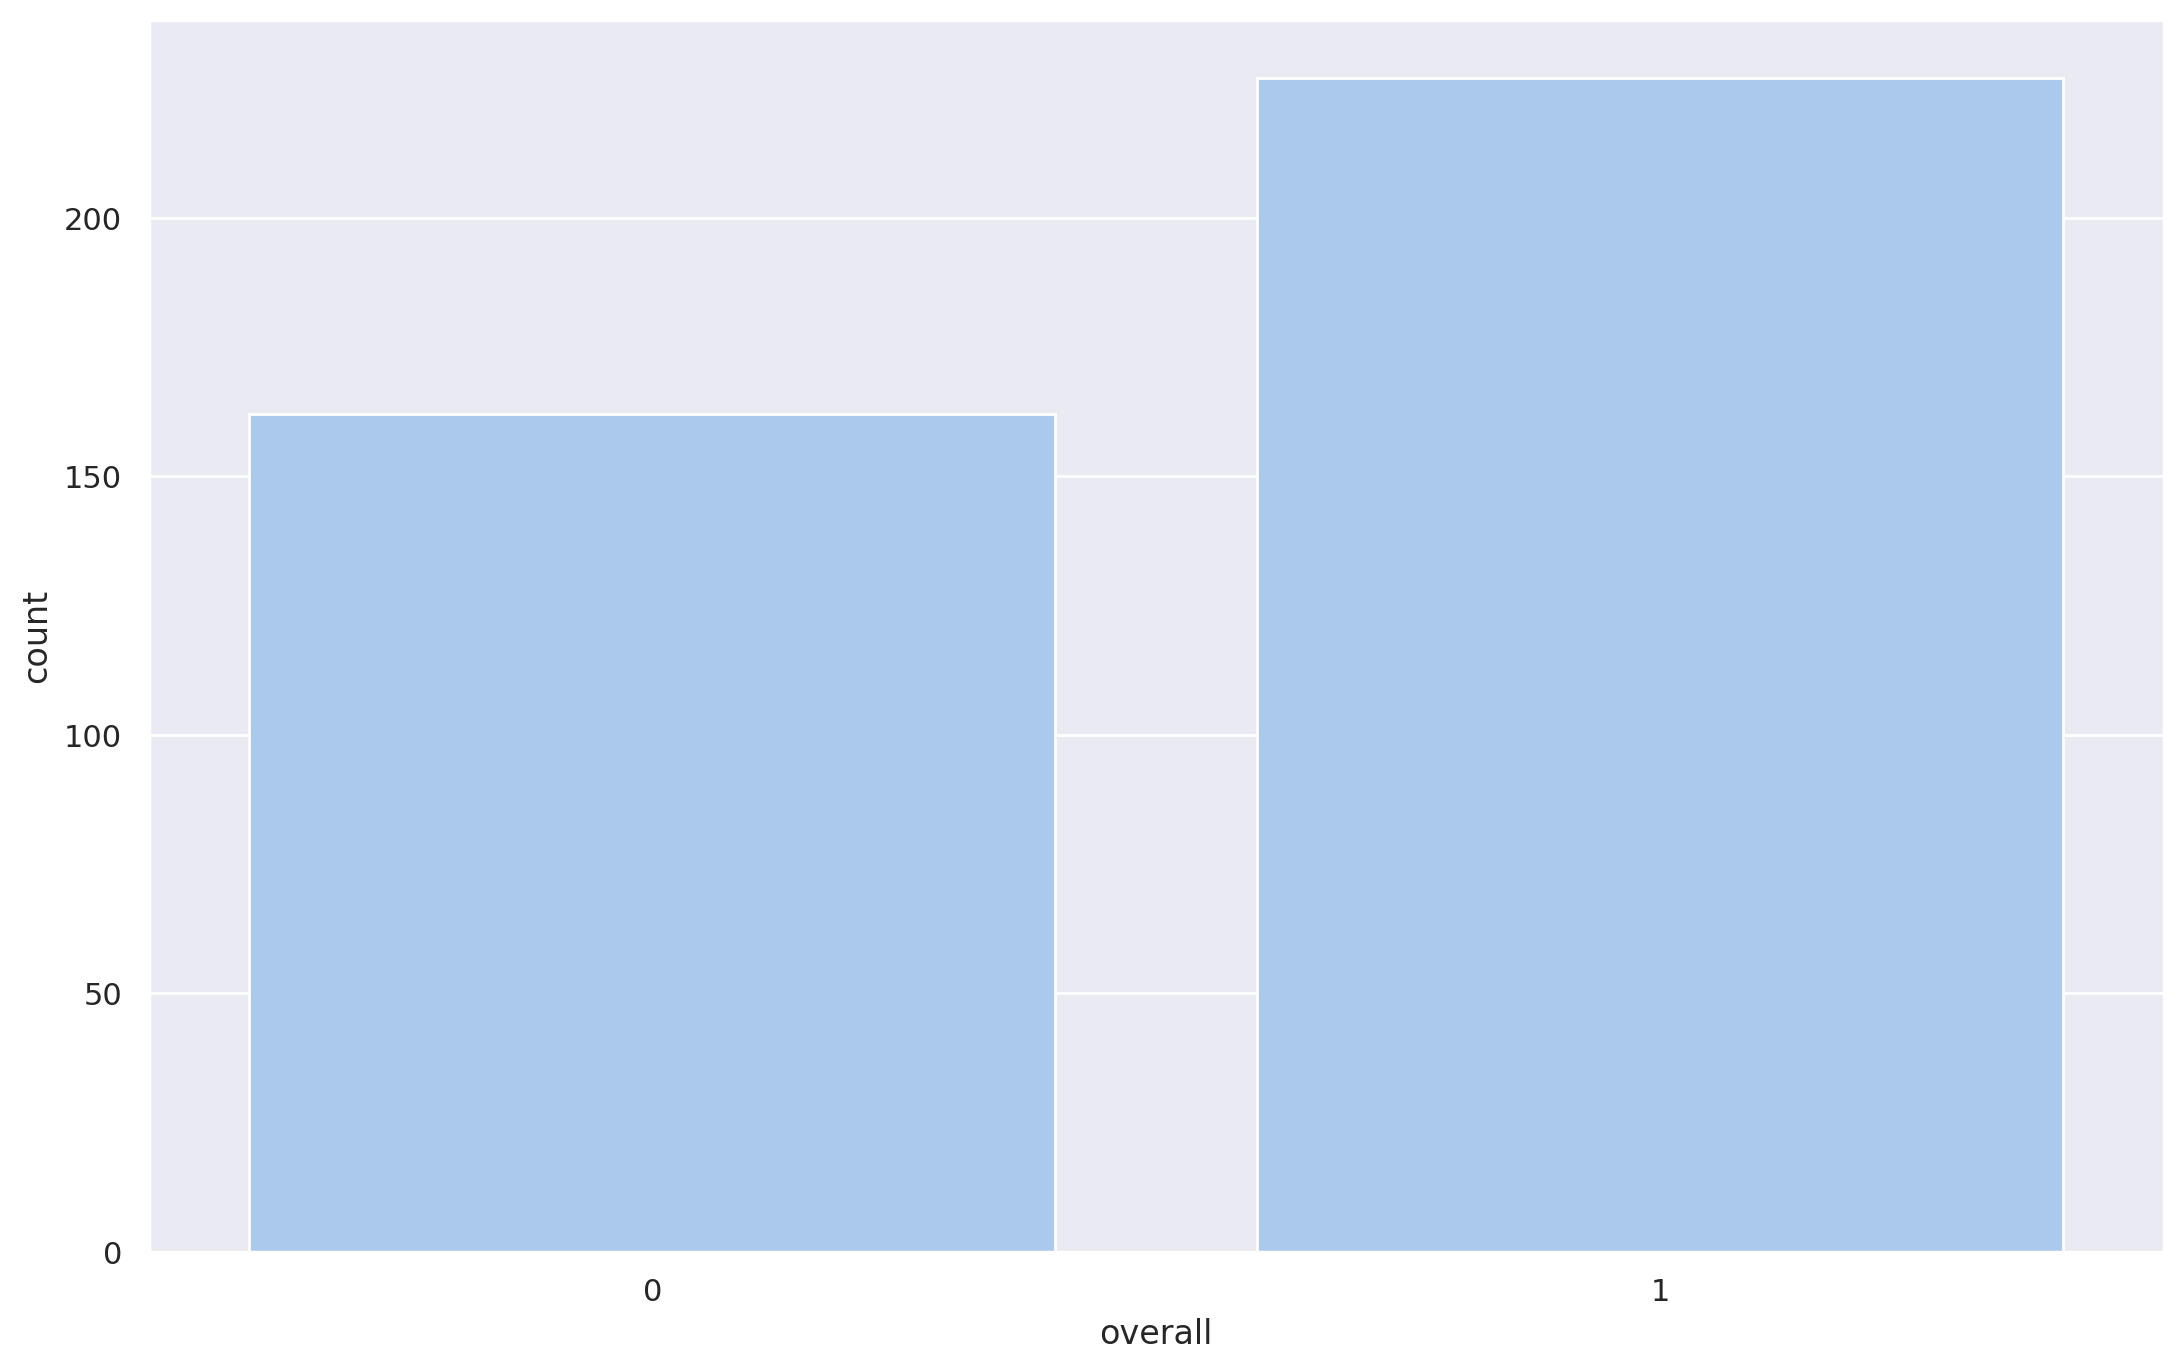

In [95]:
sns.set_theme(style='whitegrid')
sns.set(rc = {'figure.figsize':(13,8)})
sns.set_palette("pastel")
sns.countplot(x='overall',data=review)

## Word cloud of review tesxt

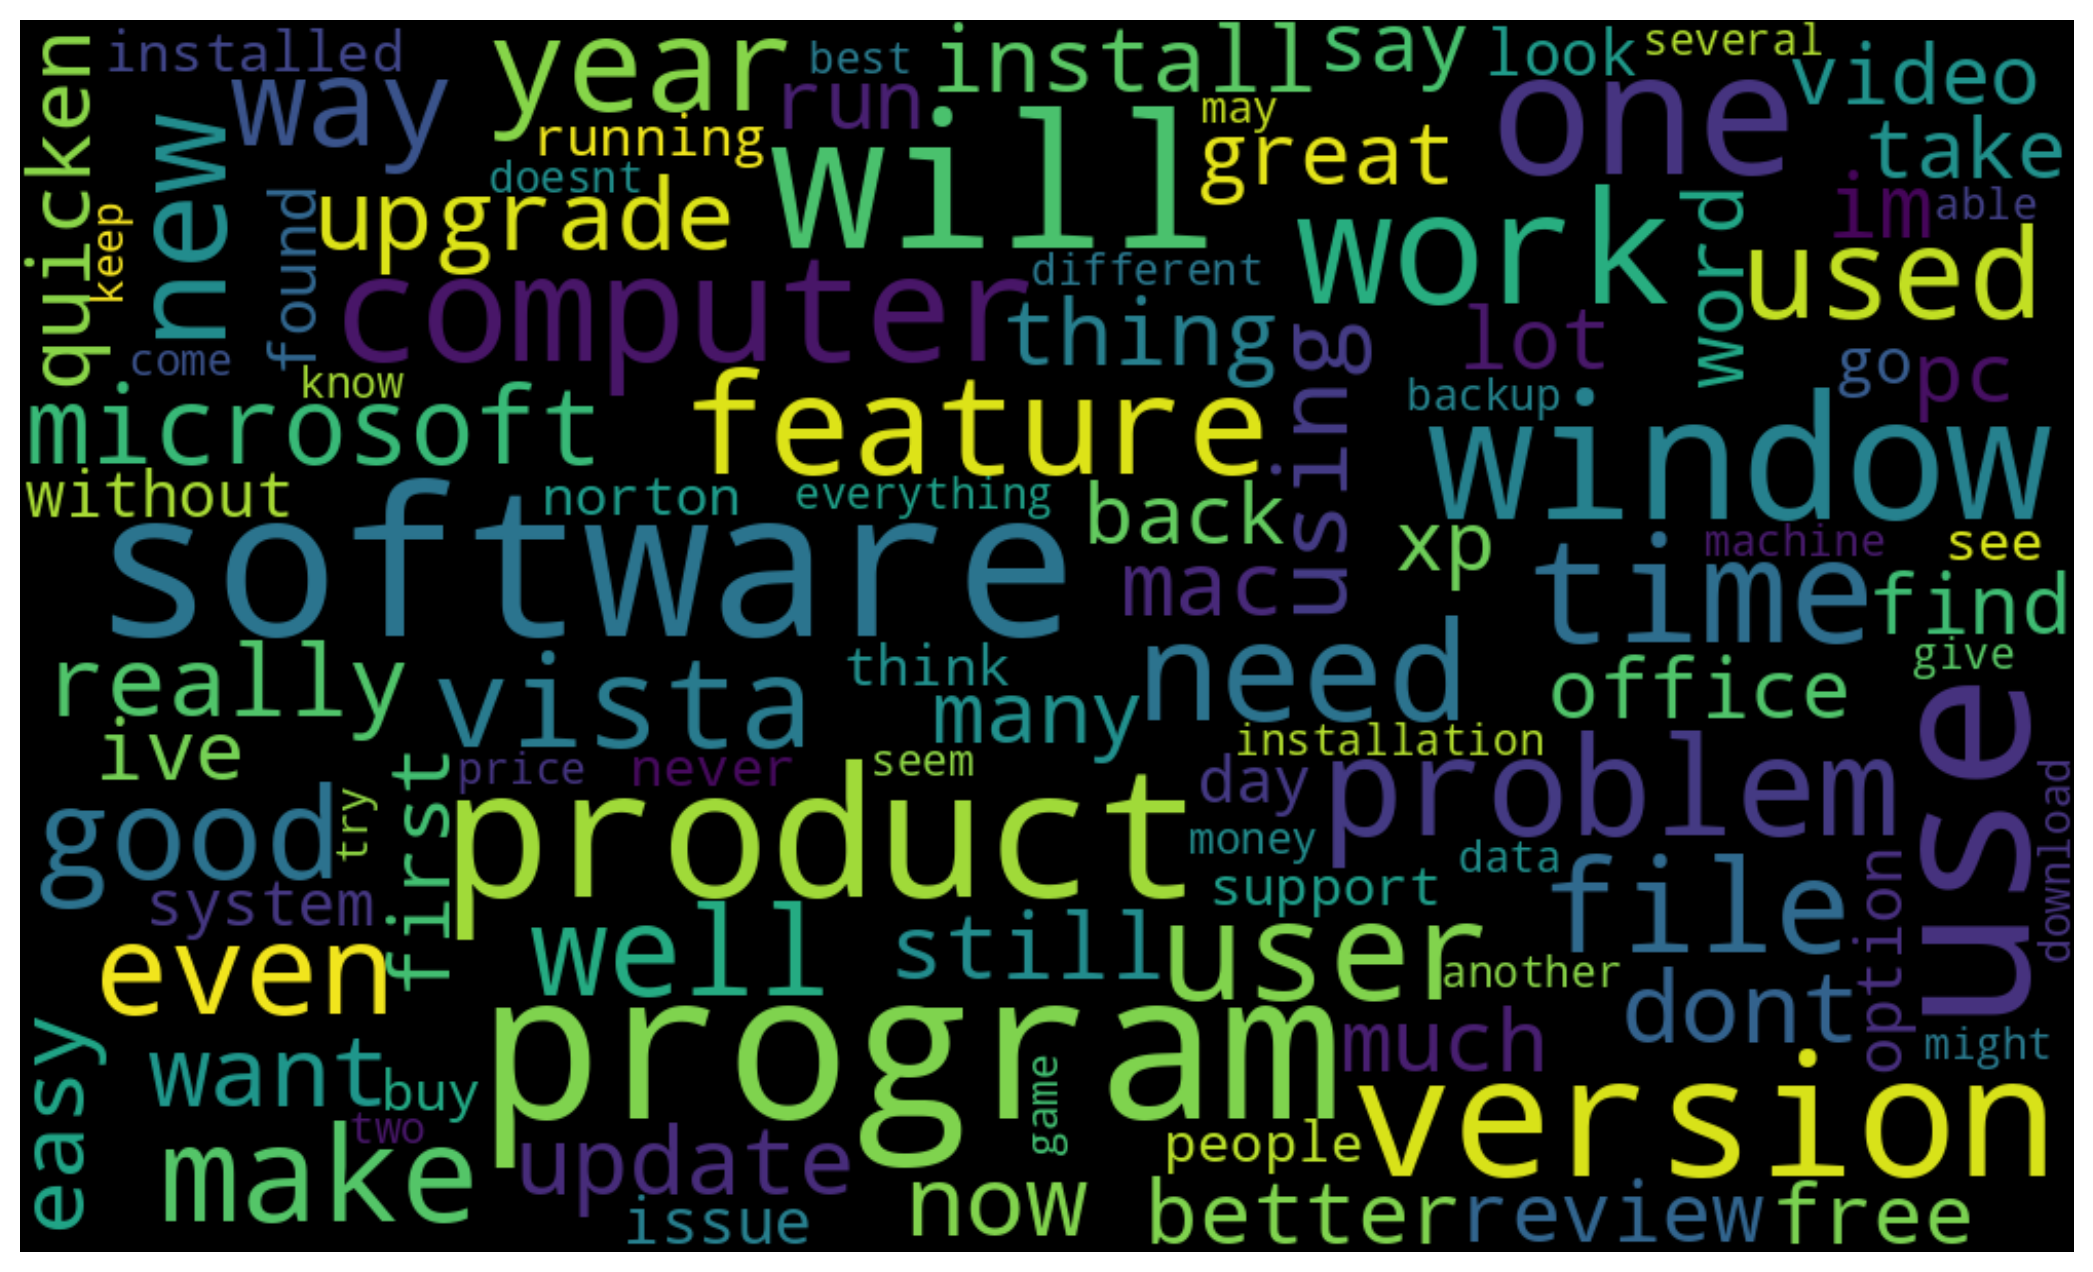

In [96]:
txt = ' '.join(rev for rev in review.reviewText)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [97]:
positive = review[review['overall']==1]
negative = review[review['overall']==0]

## Wordcloud for Positive Reviews

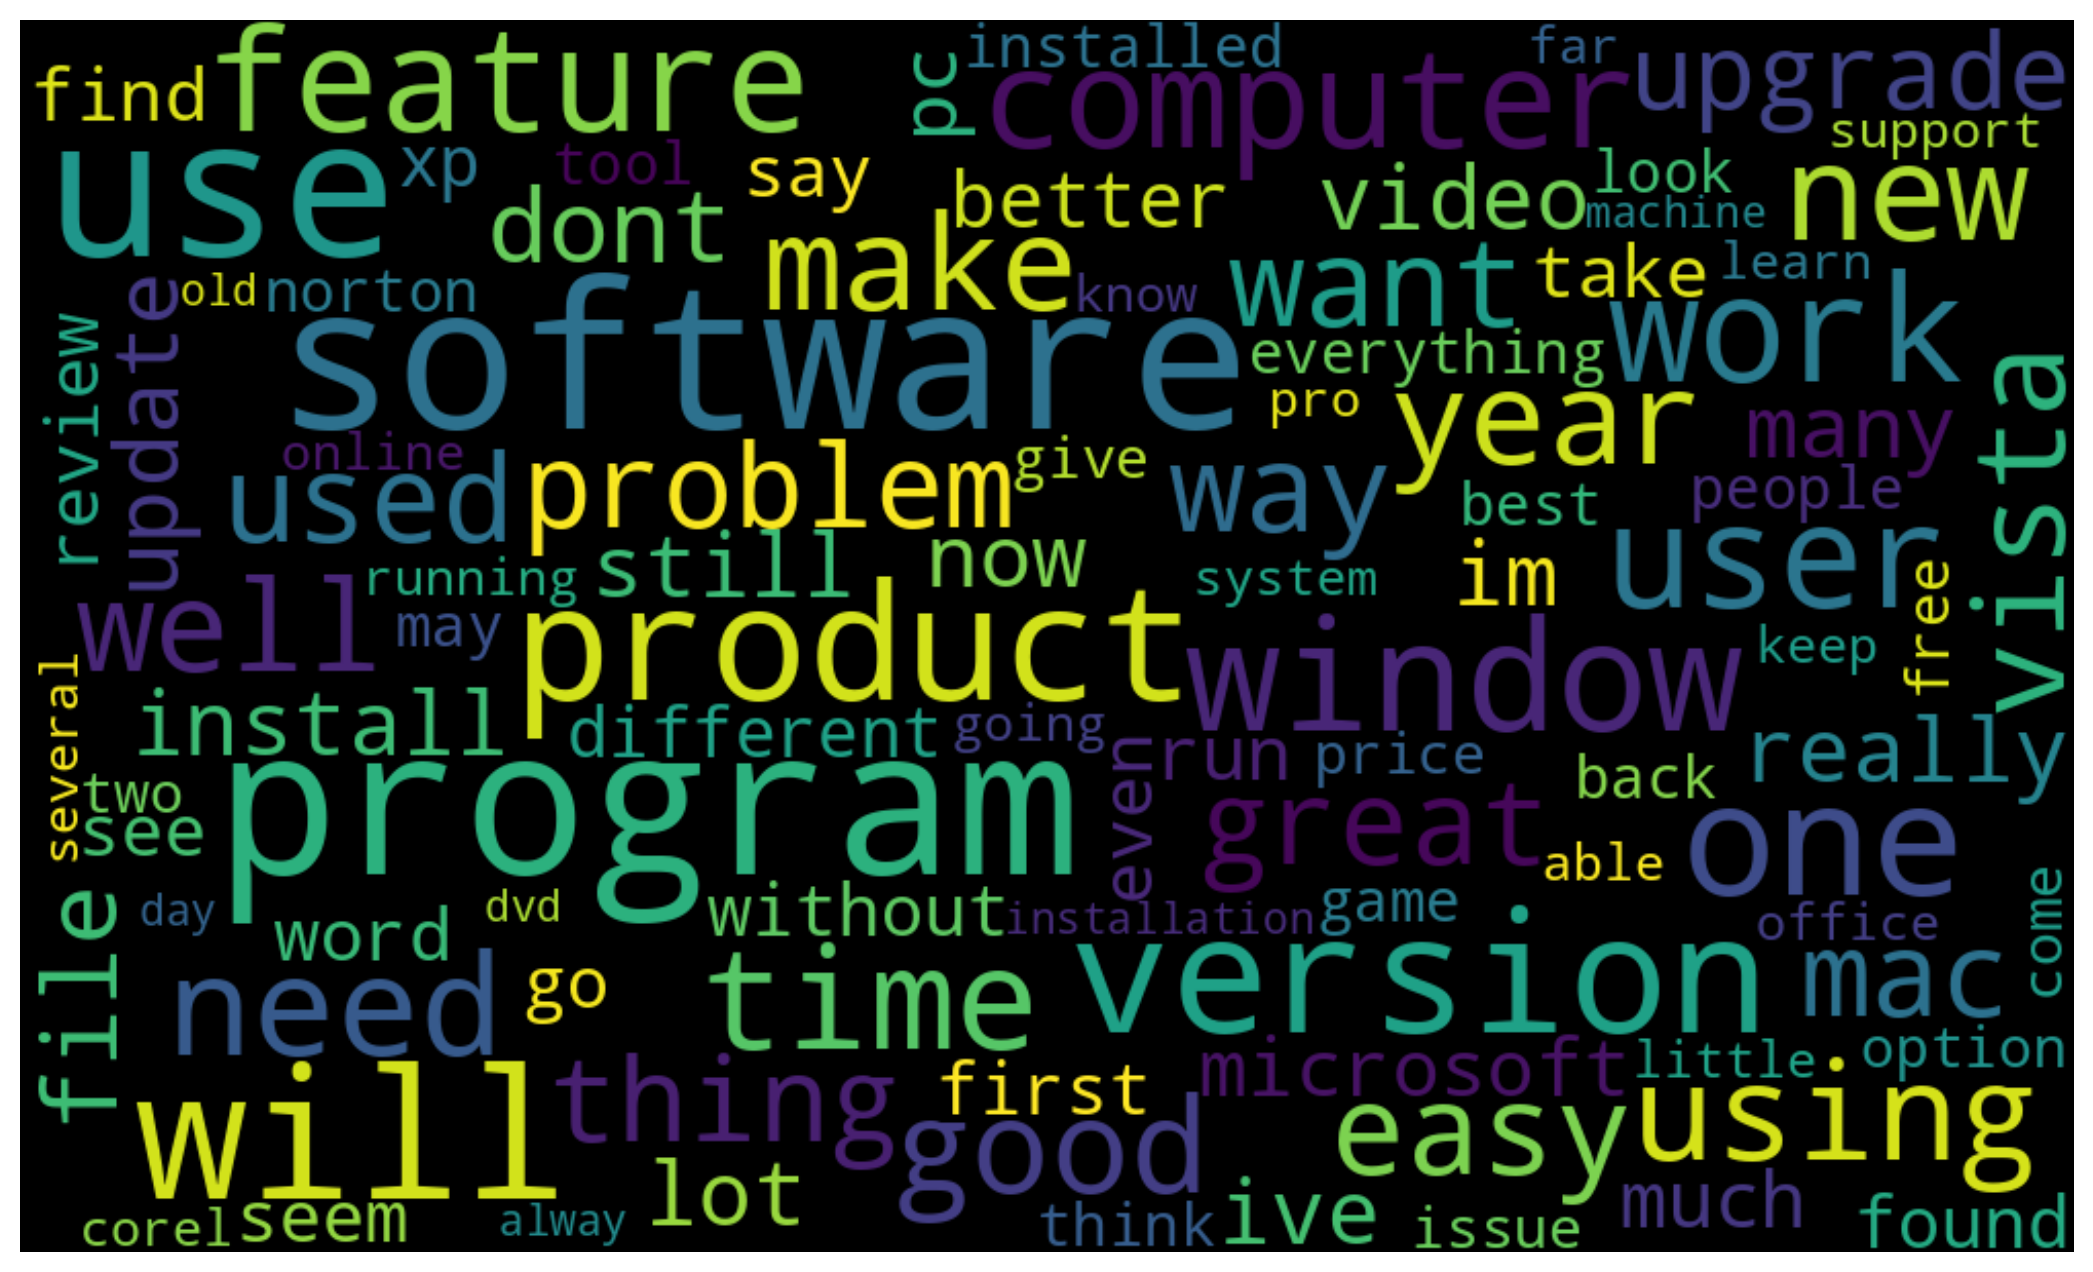

In [98]:
txt = ' '.join(rev for rev in positive.reviewText)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

## Wordcloud of Negative Reviews

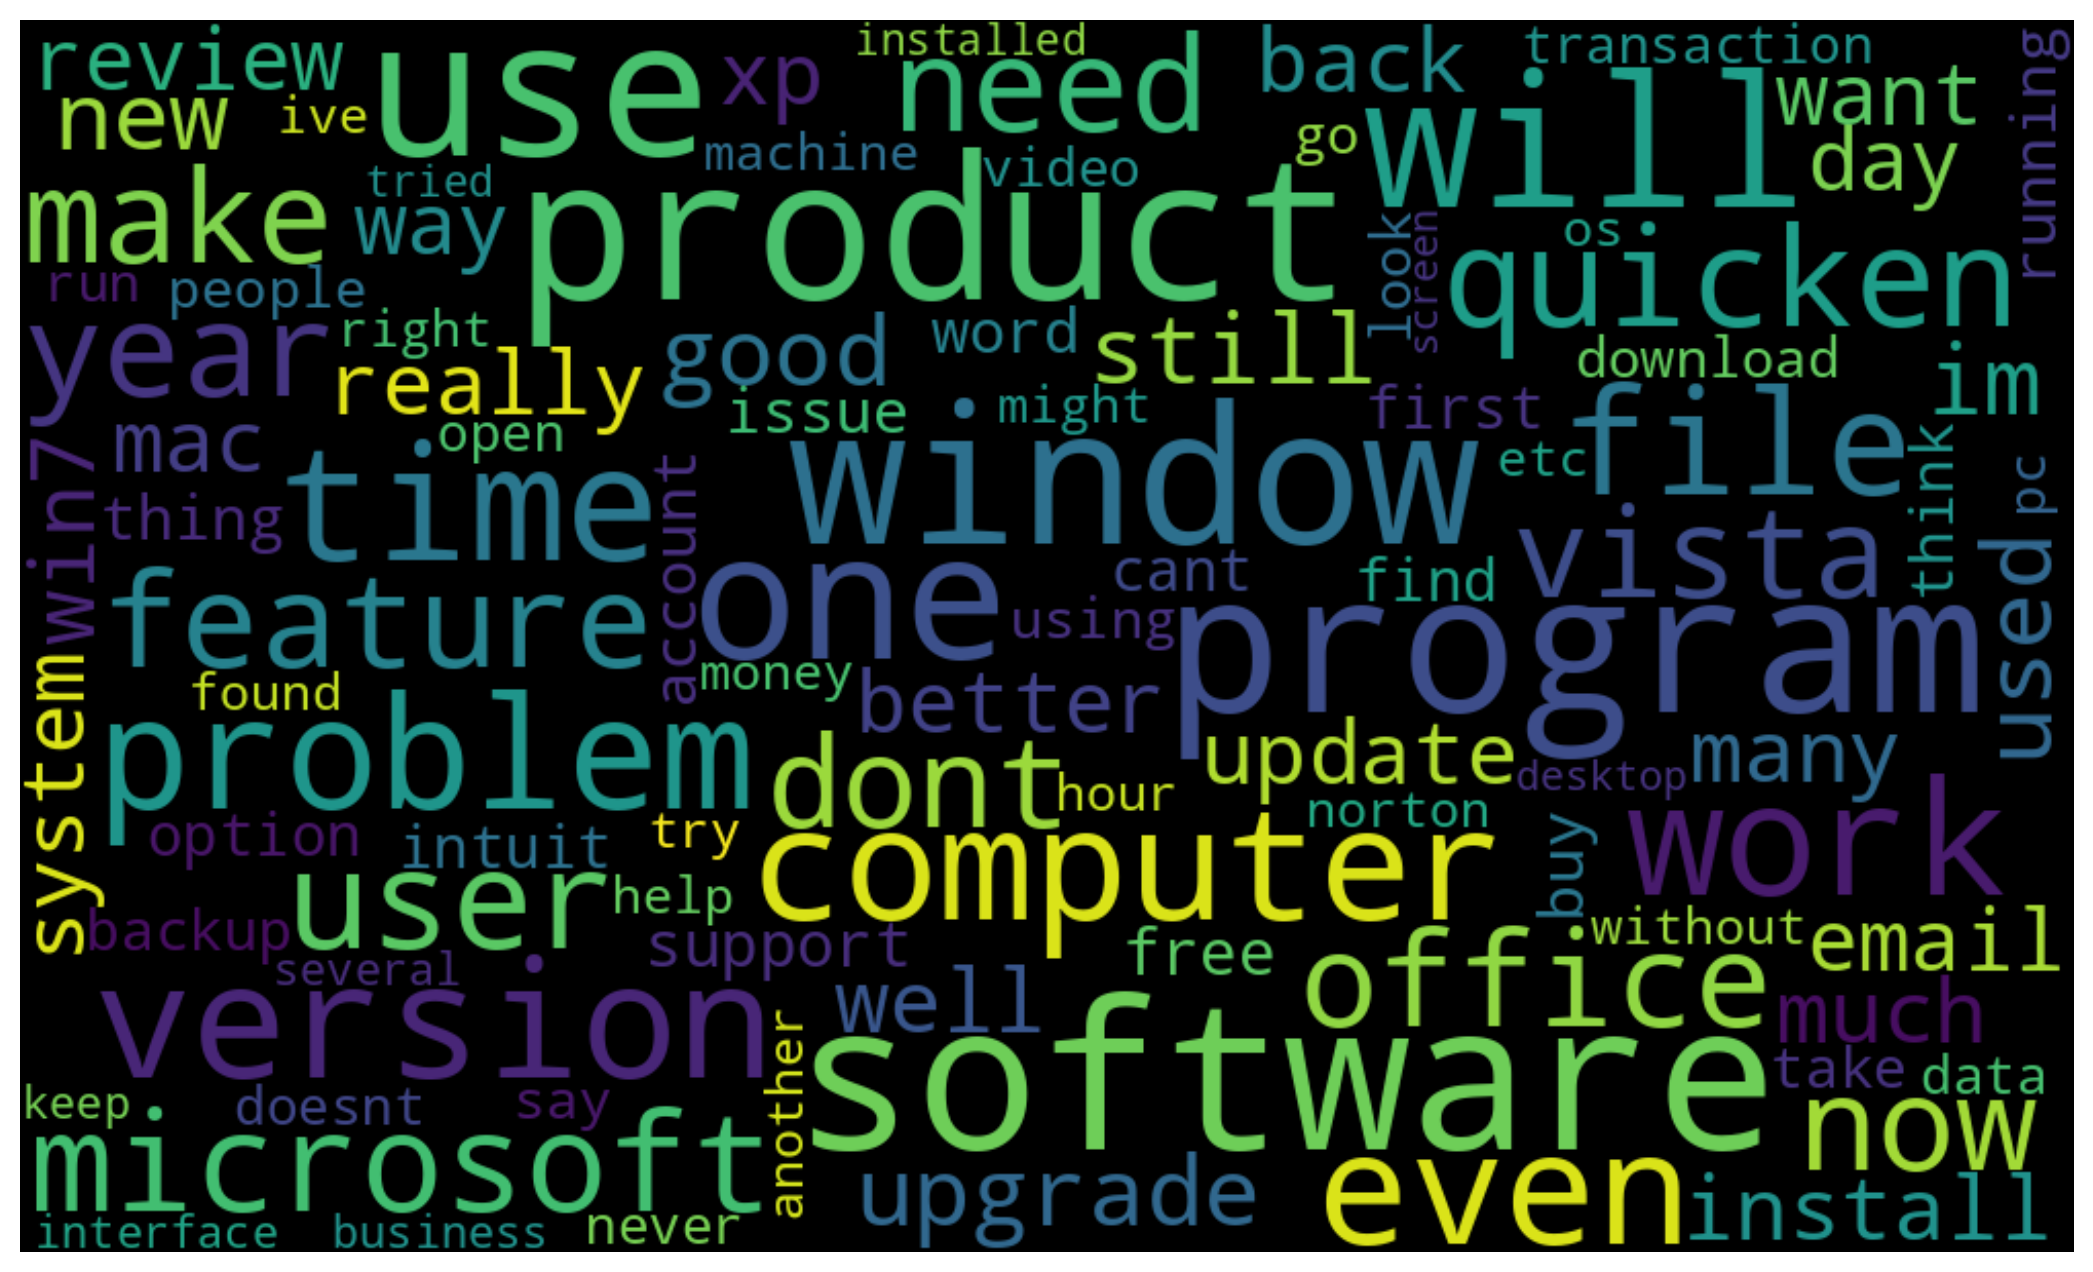

In [99]:
txt = ' '.join(rev for rev in negative.reviewText)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [100]:
review_vis = review.copy()

In [101]:
review_vis['Num_word_review'] = review_vis['reviewText'].apply(lambda x:len(str(x).split()))

Distribution of wordcount

<Axes: xlabel='Num_word_review', ylabel='Count'>

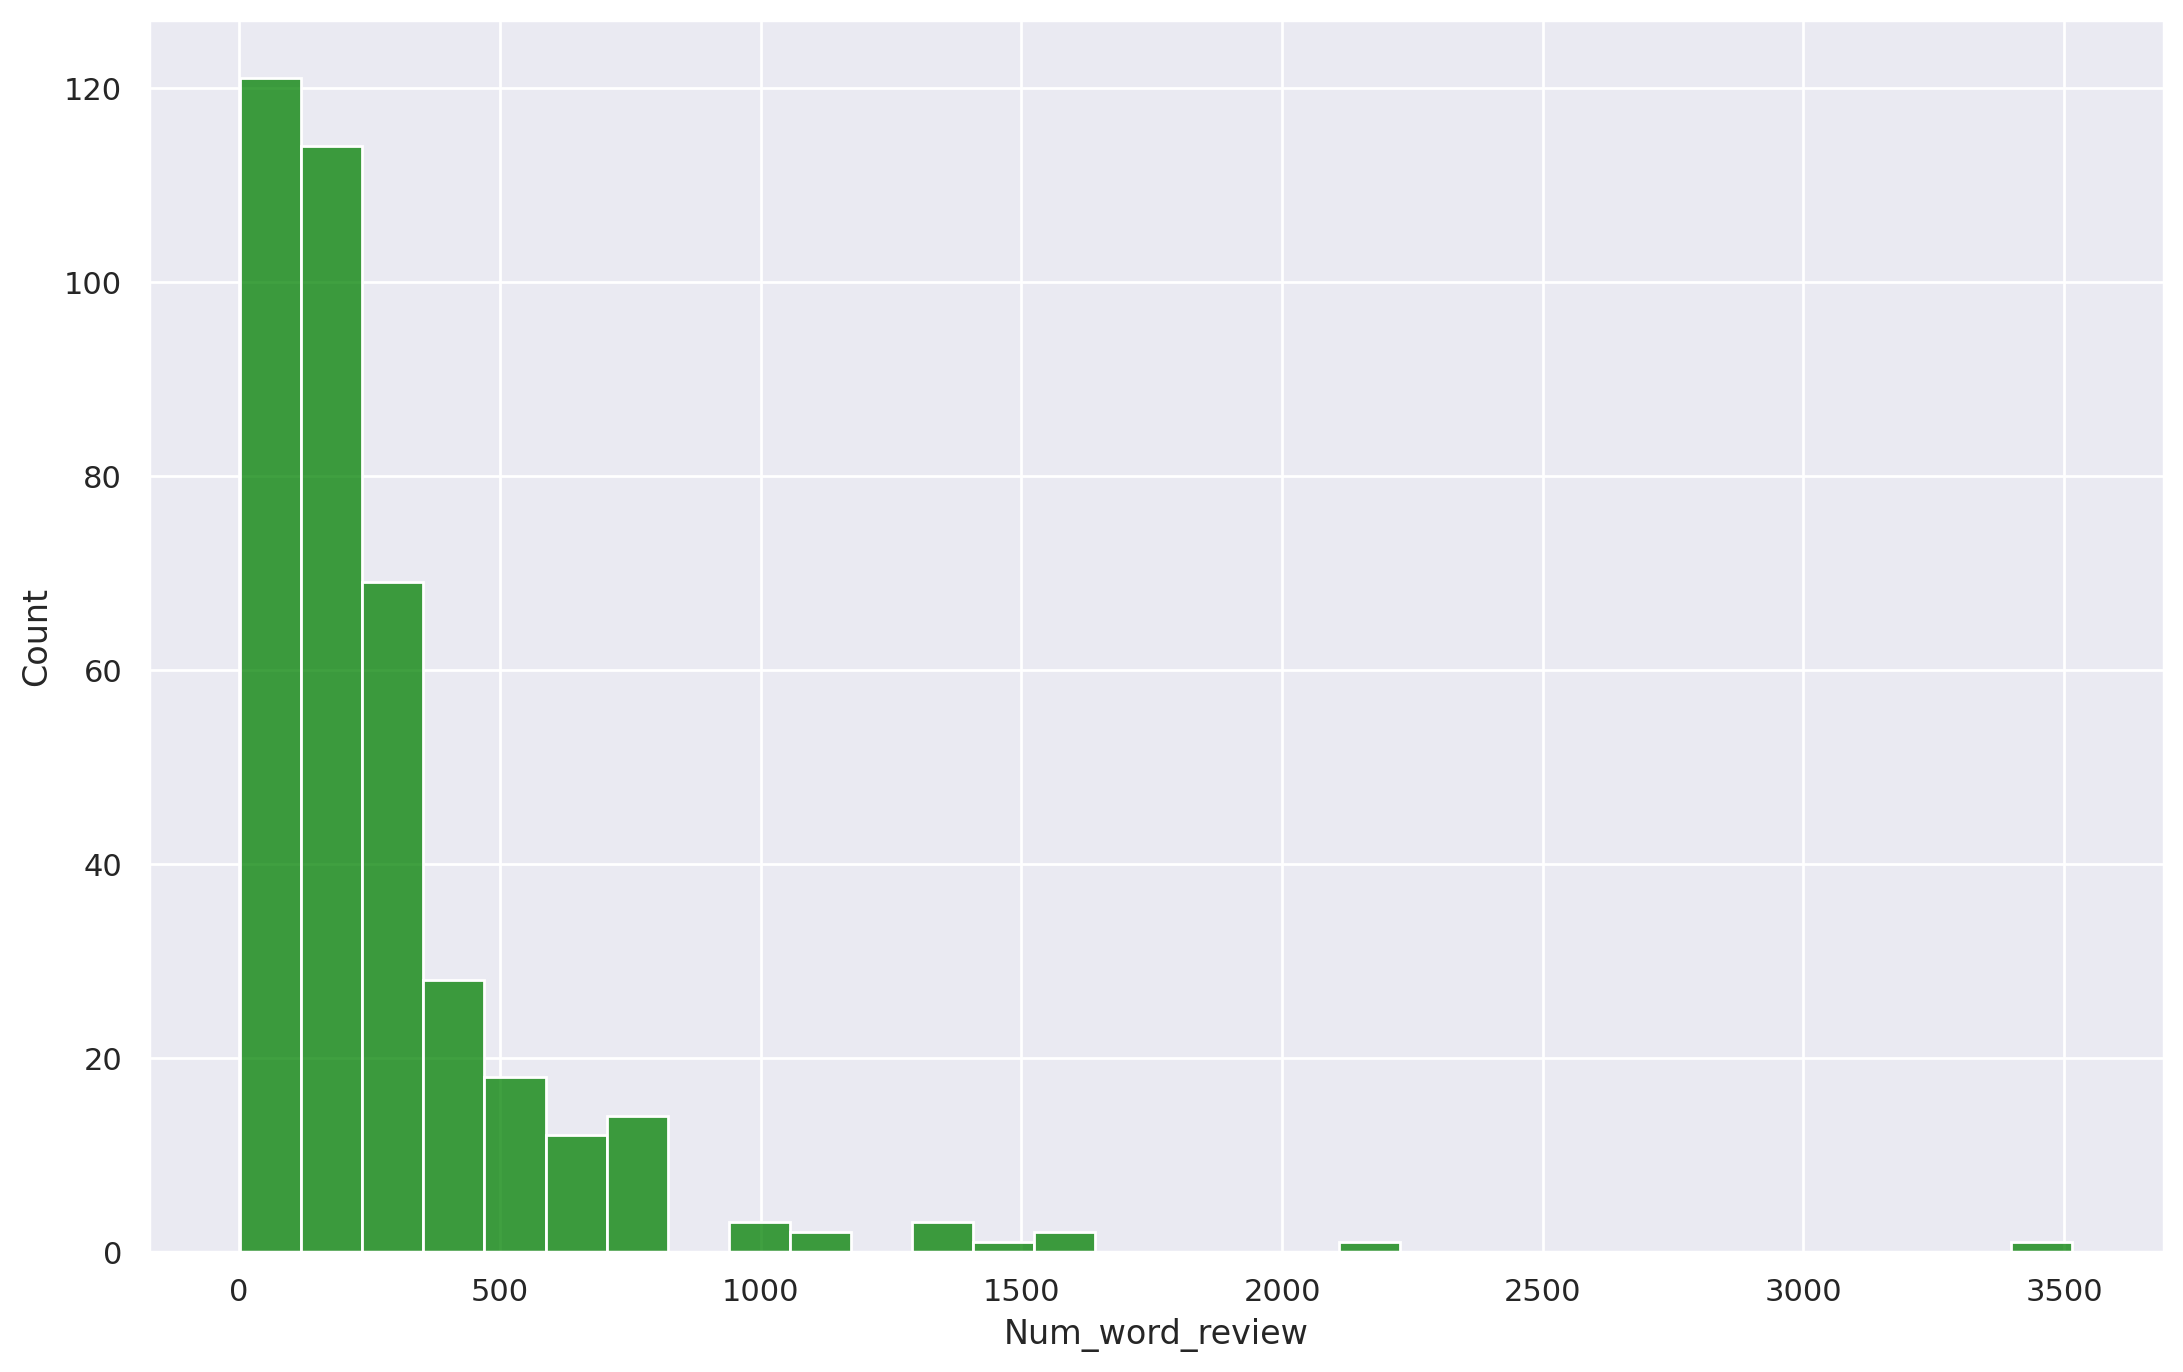

In [102]:
sns.histplot(data=review_vis, x="Num_word_review",bins=30,color='green')

Distribution of all words

In [103]:
review_vis['temp_list'] = review_vis['reviewText'].apply(lambda x:str(x).split())
top = Counter([item for sublist in review_vis['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

In [104]:
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
nltk.download('stopwords')
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Clean data

In [105]:
review.isnull().sum()

Unnamed: 0.1                  0
Unnamed: 0                    0
overall                       0
reviewText                    0
summary                       0
vote                          0
review_cleaned                0
summary_cleaned               0
review_cleaned_lemmatized     0
summary_cleaned_lemmatized    0
review_sentiment_score        0
summary_sentiment_score       0
dtype: int64

In [106]:
review = review.drop_duplicates(keep='first')

In [107]:
review.shape

(389, 12)

In [108]:
def clean(raw):
    """ Remove hyperlinks and markup """
    result = re.sub("<[a][^>]*>(.+?)</[a]>", 'Link.', raw)
    result = re.sub('&gt;', "", result)
    result = re.sub('&#x27;', "'", result)
    result = re.sub('&quot;', '"', result)
    result = re.sub('&#x2F;', ' ', result)
    result = re.sub('<p>', ' ', result)
    result = re.sub('</i>', '', result)
    result = re.sub('&#62;', '', result)
    result = re.sub('<i>', ' ', result)
    result = re.sub("\n", '', result)
    return result

In [109]:
def remove_num(texts):
   output = re.sub(r'\d+', '', texts)
   return output

In [110]:
def deEmojify(x):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', x)

In [111]:
def unify_whitespaces(x):
    cleaned_string = re.sub(' +', ' ', x)
    return cleaned_string

In [112]:
def remove_symbols(x):
    cleaned_string = re.sub(r"[^a-zA-Z0-9?!.,]+", ' ', x)
    return cleaned_string

In [113]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"',','))
    return final

In [114]:
stop=set(stopwords.words("english"))
stemmer=PorterStemmer()
lemma=WordNetLemmatizer()

def remove_stopword(text):
   text=[word.lower() for word in text.split() if word.lower() not in stop]
   return " ".join(text)

In [115]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
def Stemming(text):
   stem=[]
   stopword = stopwords.words('english')
   snowball_stemmer = SnowballStemmer('english')
   word_tokens = nltk.word_tokenize(text)
   stemmed_word = [snowball_stemmer.stem(word) for word in word_tokens]
   stem=' '.join(stemmed_word)
   return stem

In [116]:
def cleaning(df,review):
    df[review] = df[review].apply(clean)
    df[review] = df[review].apply(deEmojify)
    df[review] = df[review].str.lower()
    df[review] = df[review].apply(remove_num)
    df[review] = df[review].apply(remove_symbols)
    df[review] = df[review].apply(remove_punctuation)
    df[review] = df[review].apply(remove_stopword)
    df[review] = df[review].apply(unify_whitespaces)

In [117]:
cleaning(review,'reviewText')

In [118]:
review[['reviewText']].head(20)

reviewText
0   even though use dreamweaver great deal several...
1   complete rubbish got acer aspire laptop instal...
2   youre like us thought getting something like l...
3   nancy drew asked stay aunt eloises house solve...
4   nancy drew solving another mystery rick arlen ...
5   year nearly still using windows used nt user s...
6   worked studied dramatica theory story developm...
7   dramatica way organise thoughts theme plotthem...
8   satisfied purchase wireless routerthe setup to...
9   received adapter wireless router also engenius...
10  perfect switch someone looking affordable mana...
11  bought mouse year ago great love charge cannot...
12  finally sub port switchroutervpnfirewall state...
13  pci card add usb older computer slots back one...
14  famous roxio adaptec people might know develop...
15  ive cd burner version product time loved wante...
16  beginner desktop publishing want put personal ...
17  passing nancy drew game games gotten better pa...
18  store saw game sale really cheap thought hey g...
19  perhaps ive become jaded windows systems look ...

In [119]:
review_vis2 = review.copy()

In [120]:
review_vis2['temp_list'] = review_vis2['reviewText'].apply(lambda x:str(x).split())
top = Counter([item for sublist in review_vis2['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

In [121]:
# reviews = clean_data["review_cleaned_lemmatized"].values.tolist()
# labels = clean_data["overall"].tolist()

## Create our Model

In [122]:
reviews = review["reviewText"].values.tolist()
labels = review["overall"].tolist()

In [123]:
# split the dataset into train, validation and holdout sets (60-20-20)
training_sentences, test_sentences, training_labels, test_labels = train_test_split(reviews, labels, test_size=.4)

validation_sentences, holdout_sentences, validation_labels, holdout_labels = train_test_split(test_sentences, test_labels, test_size=.5)

In [124]:
PRE_TRAINED_MODEL_NAME = "bert-base-cased"

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tokenizers import BertWordPieceTokenizer

import transformers
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

import logging
transformers.logging.set_verbosity_error()

## Tokenize the Data

In [126]:
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [127]:
# Example of the tokenizer output
tokenizer([training_sentences[0]], truncation=True,
                            padding=True, max_length=512)

{'input_ids': [[101, 1353, 1671, 3172, 1702, 3594, 1788, 1494, 1712, 11438, 1671, 14409, 3594, 1380, 4615, 1956, 1336, 1525, 5616, 1226, 1240, 1162, 1702, 1380, 3014, 10066, 5756, 1231, 2093, 25768, 5756, 2653, 1895, 14952, 2222, 182, 1116, 1701, 11438, 5250, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [128]:
# We tokenize training, validation and hold-out Texts

train_encodings = tokenizer(training_sentences,
                            truncation=True,
                            padding=True)

validation_encodings = tokenizer(validation_sentences,
                            truncation=True,
                            padding=True)

holdout_encodings = tokenizer(holdout_sentences,
                            truncation=True,
                            padding=True)

In [129]:
# We convert the input encodings and labels into a TensorFlow Dataset object

train_dataset = tf.data.Dataset.from_tensor_slices((
                            dict(train_encodings),
                            training_labels
                            ));

validation_dataset = tf.data.Dataset.from_tensor_slices((
                            dict(validation_encodings),
                            validation_labels
                            ));

holdout_dataset = tf.data.Dataset.from_tensor_slices((
                            dict(holdout_encodings),
                            holdout_labels
                            ));

## Fine Tune Classifier Model

In [130]:
model = TFBertForSequenceClassification.from_pretrained('bert-base-cased',num_labels=2)

In [131]:
from transformers import AdamW

In [132]:
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5, epsilon=1e-08)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [133]:
history = model.fit(train_dataset.shuffle(100).batch(8),
          epochs=3,
          batch_size=8,
          validation_data=validation_dataset.shuffle(100).batch(8), verbose=1)

Epoch 1/3


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
30/30 [==============================] - 2232s 70s/step - loss: 6.6348 - accuracy: 0.5365 - val_loss: 6.4516 - val_accuracy: 0.5769
Epoch 2/3
30/30 [==============================] - 2029s 68s/step - loss: 6.6756 - accuracy: 0.5150 - val_loss: 6.4516 - val_accuracy: 0.5769
Epoch 3/3
30/30 [==============================] - 2117s 71s/step - loss: 6.6756 - accuracy: 0.5107 - val_loss: 6.4516 - val_accuracy: 0.5769


Results of

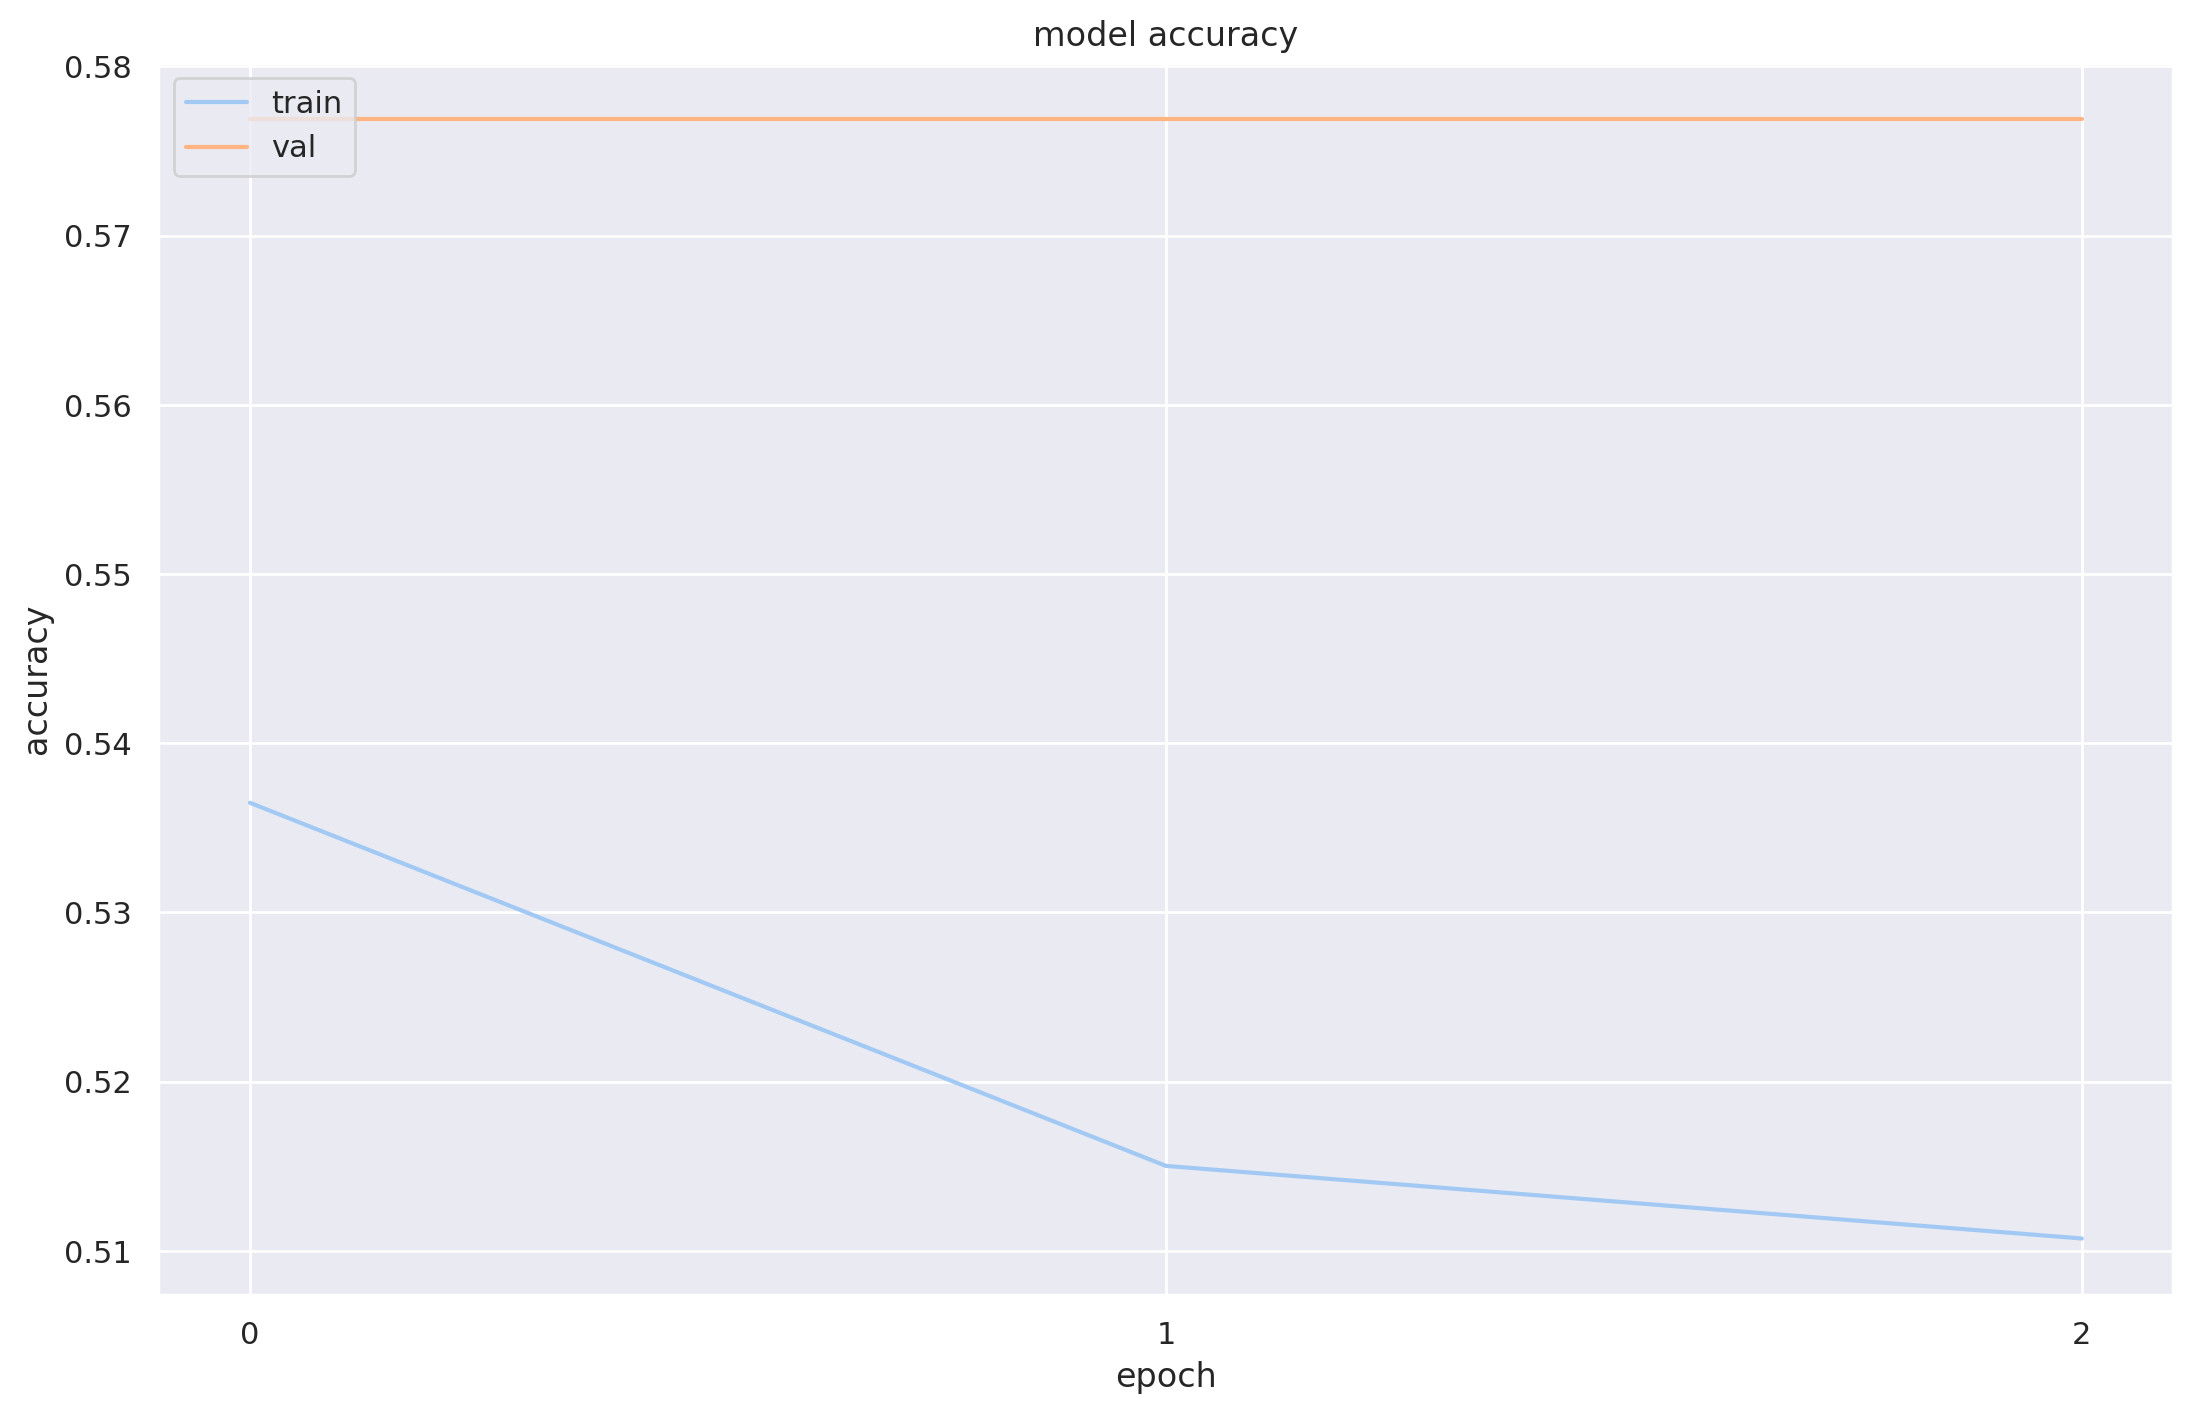

In [134]:
# We plot train and validation accuracy
from matplotlib.ticker import MaxNLocator
ax = plt.figure().gca()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [135]:
model.save_pretrained("./output_model")

In [136]:
# We load the model and then evaluate it on holdout set

loaded_model = TFBertForSequenceClassification.from_pretrained("./output_model")
result = model.evaluate(holdout_dataset.batch(8))
dict(zip(model.metrics_names, result))

10/10 [==============================] - 186s 18s/step - loss: 5.2786 - accuracy: 0.6538


{'loss': 5.278582572937012, 'accuracy': 0.6538461446762085}

In [137]:
# Then we predict the sentiment for holdout set

tf_output = loaded_model.predict(holdout_dataset.batch(8))
pred_label = tf.argmax(tf.nn.softmax(tf_output["logits"], axis=1).numpy(), 1).numpy()

10/10 [==============================] - 206s 19s/step


In [ ]:
# After that we create the confusion matrix of our predictions

cm = tf.math.confusion_matrix(
    holdout_labels, pred_label, num_classes=2, weights=None, dtype=tf.dtypes.int32,
    name=None
).numpy()

print("confusion matrix\n",cm)

In [ ]:
# We can visualize the confusion matrix

cm_norm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

cm_df = pd.DataFrame(cm_norm,
                 index = [0,1],
                 columns =[0,1])

figure = plt.figure(figsize=(4, 4))
sns.heatmap(cm_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Precision, Recall, and F1-Score

tp = cm[0][0]
fn = cm[0][1]

tn = cm[1][1]
fp = cm[1][0]

recall = round(tp / (tp+fn), 2)
precision = round(tp / (tp+fp), 2)
f1score = (2*precision*recall) / (precision + recall)

print("recall score:", recall)
print("precision score:", precision)
print("F1-Score:",f1score)

# BERT Model: Sequence Classification Model
Code was modified from source code found at https://github.com/abu-rayyan/Tutorials/blob/master/multi_class_sentiment_analysis_with_bert.ipynb

## Still using the same pretrained model

In [138]:
#tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

In [139]:
sample_txt = 'Sales of clothing developed best.'

In [140]:
tokens = tokenizer.tokenize(sample_txt)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f'Sentence: {sample_txt}')
print(f'Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

Sentence: Sales of clothing developed best.
Tokens: ['Sales', 'of', 'clothing', 'developed', 'best', '.']
Token IDs: [15689, 1104, 5413, 1872, 1436, 119]


## Create separator token

In [141]:
tokenizer.sep_token, tokenizer.sep_token_id

('[SEP]', 102)

In [142]:
tokenizer.cls_token, tokenizer.pad_token_id

('[CLS]', 0)

## Create padding token

In [143]:
tokenizer.pad_token, tokenizer.pad_token_id

('[PAD]', 0)

## Create Tokens for Unknown Words

In [144]:
tokenizer.unk_token, tokenizer.unk_token_id

('[UNK]', 100)

## Encode the Data

In [145]:
encoding = tokenizer.encode_plus(
    sample_txt, #input
    max_length=12, #constraint
    add_special_tokens=True, # Add '[CLS]' and '[SEP]'
    return_token_type_ids=False, #Protocol
    padding="max_length", #set padding
    return_attention_mask=True, #set attention mask to true
    return_tensors='pt', #Return pytorch tensors
)
encoding.keys() # view encoding keys

dict_keys(['input_ids', 'attention_mask'])

In [146]:
print(len(encoding['input_ids'][0]))
encoding['input_ids'][0] #view tensor frr input ids

12


tensor([  101, 15689,  1104,  5413,  1872,  1436,   119,   102,     0,     0,
            0,     0])

In [147]:
print(len(encoding['attention_mask'][0]))
encoding['attention_mask'][0] #view tensor for the attention mask

12


tensor([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

In [148]:
token_lens = []
for txt in clean_data.review_cleaned_lemmatized: ## Tokenize review cleaned lemmatized, same data from the from scratch model
    tokens = tokenizer.encode(txt, max_length=512, truncation=True) ## Tokenize sentence
    token_lens.append(len(tokens)) ## tag length of token for sentence

## View Token distribution

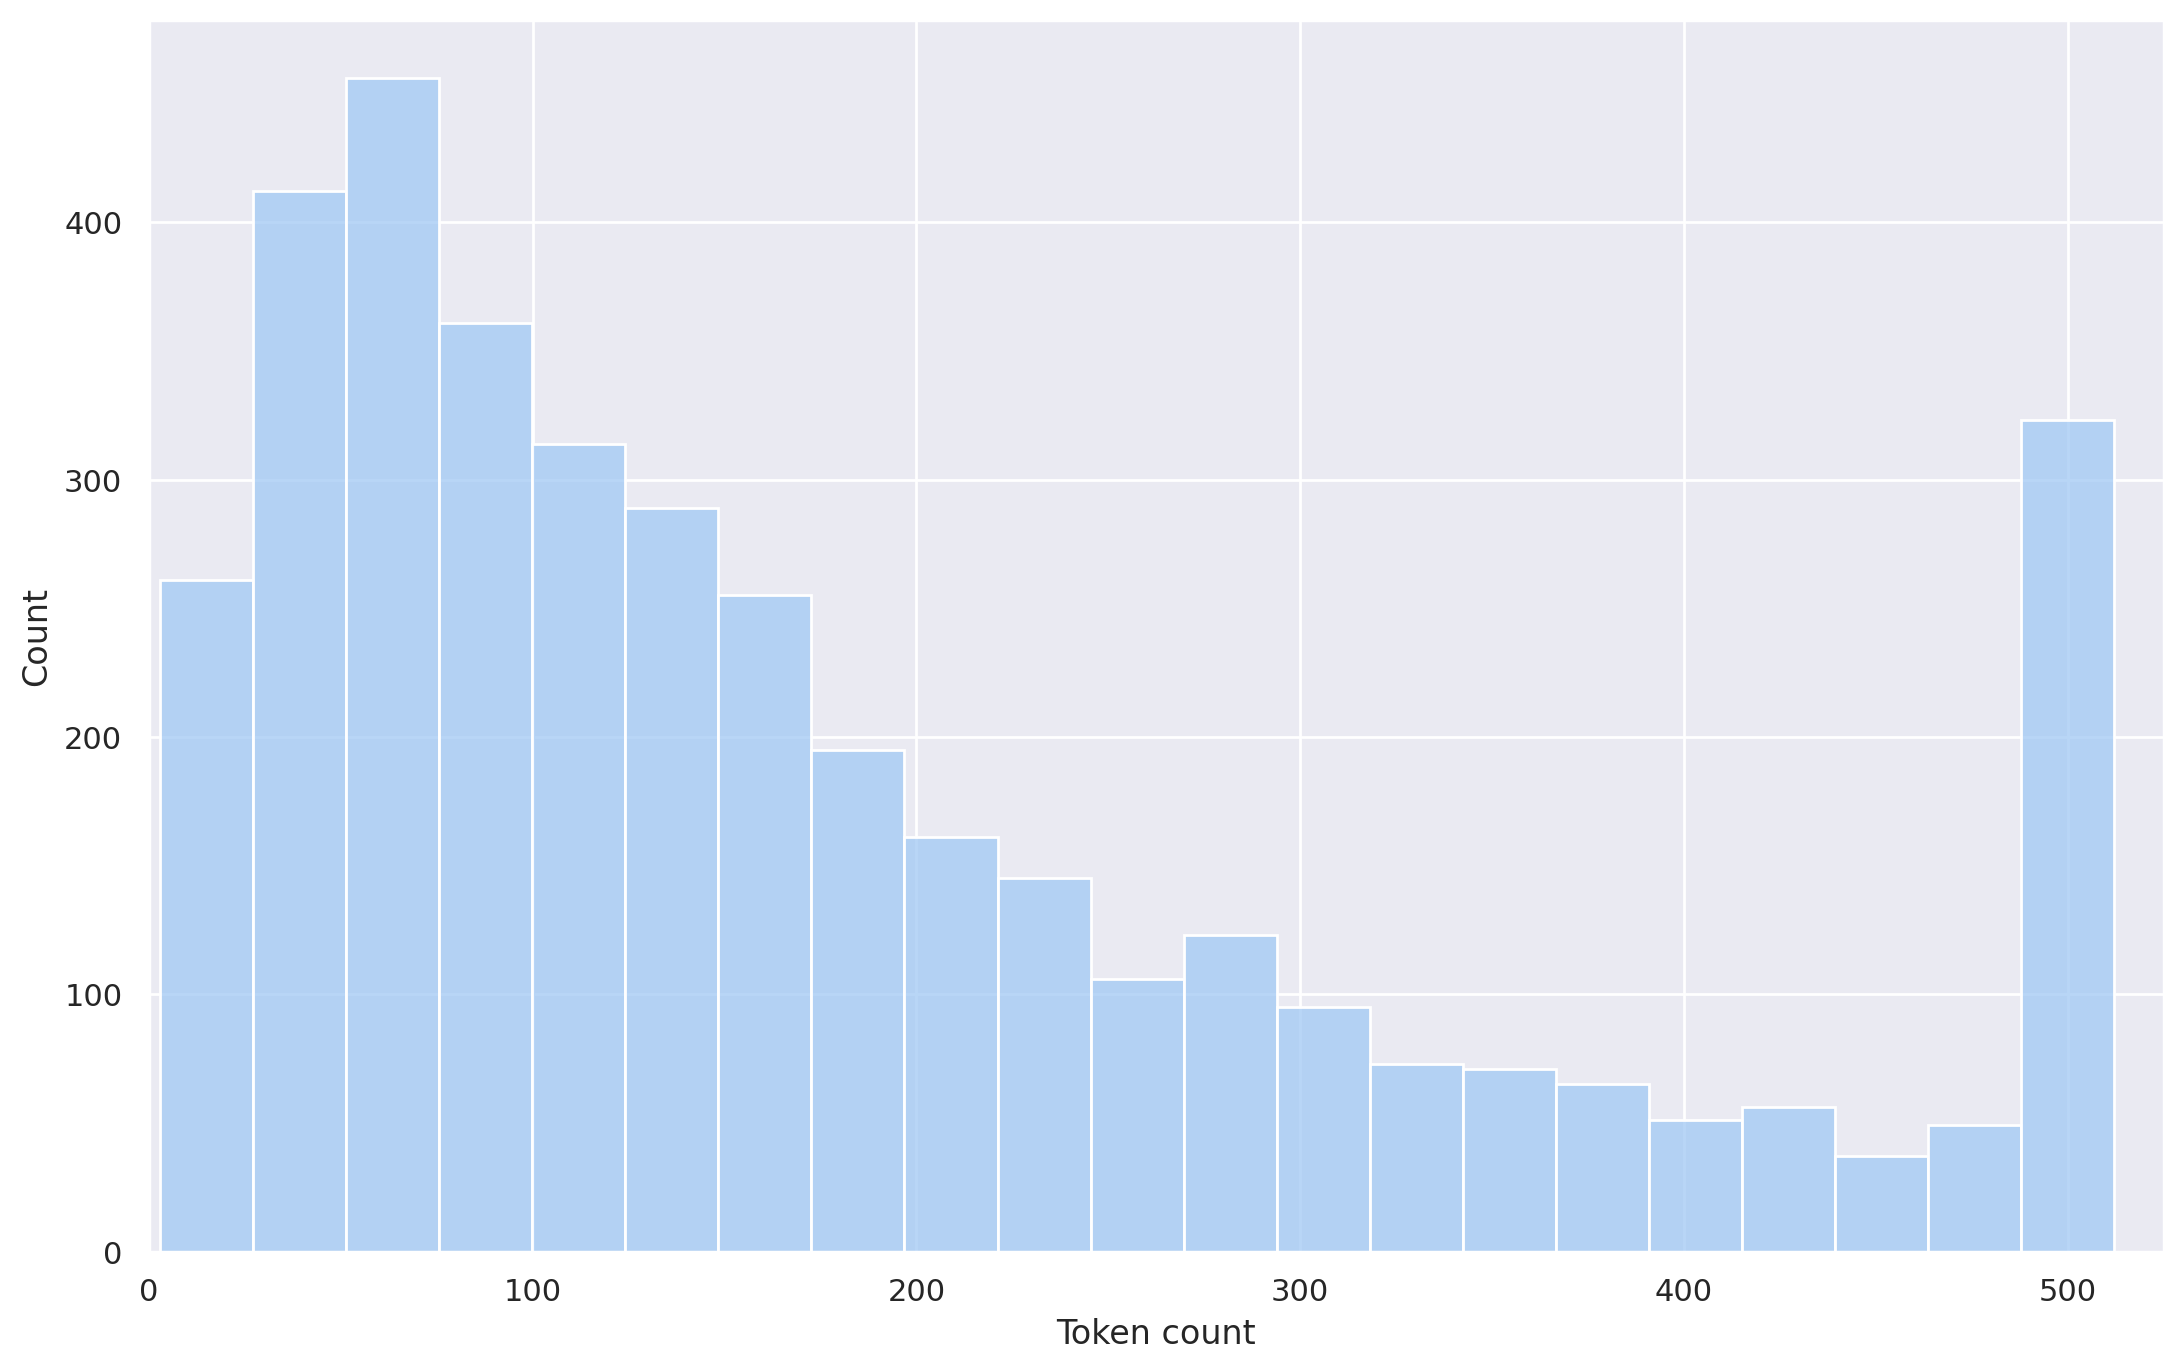

In [149]:
sns.histplot(token_lens)
plt.xlim([0,525]);
plt.xlabel('Token count');

In [150]:
MAX_LEN = 72

In [151]:
len(tokens)

248

In [152]:
from torch.utils.data import Dataset, DataLoader

## Create Dataset for Bert Sequence Classification

In [153]:
class AmazonReviewDataset(Dataset):
    def __init__(self, reviews, targets, tokenizer, max_len):
        self.reviews = reviews
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, item):
        review = str(self.reviews[item])
        target = self.targets[item]


        encoding = self.tokenizer.encode_plus(
            review,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'review_text': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets':torch.tensor(target, dtype=torch.long)
        }

In [154]:
RANDOM_SEED = 42

In [155]:
df_train, df_test = train_test_split(clean_data, test_size=0.1, random_state=RANDOM_SEED)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=RANDOM_SEED)

In [156]:
clean_data.shape

(3898, 12)

In [157]:
df_train.shape, df_val.shape, df_test.shape

((3508, 12), (195, 12), (195, 12))

In [158]:

def create_data_loader(df, tokenizer, max_len, batch_size):
    ds = AmazonReviewDataset(
        reviews=clean_data.review_cleaned_lemmatized.to_numpy(),
        targets=clean_data.overall.to_numpy(),
        tokenizer=tokenizer,
        max_len=max_len,
    )

    return DataLoader(ds, batch_size=batch_size, num_workers=4)

In [159]:
BATCH_SIZE = 16

train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [160]:
import torch

In [161]:
data = next(iter(train_data_loader))
data.keys()

dict_keys(['review_text', 'input_ids', 'attention_mask', 'targets'])

In [162]:
print(data["input_ids"].shape)
print(data["attention_mask"].shape)
print(data["targets"].shape)

torch.Size([16, 72])
torch.Size([16, 72])
torch.Size([16])


## Build sentiment classifier on top of BERT model.

In [163]:
from transformers import BertModel
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME, return_dict=False)

In [164]:
outputs = bert_model(
  input_ids=encoding['input_ids'],
  attention_mask=encoding['attention_mask'])

In [165]:
outputs[0].shape

torch.Size([1, 12, 768])

In [166]:
bert_model.config.hidden_size

768

In [167]:
from torch import nn, optim

In [168]:
class SentimentPredictor(nn.Module):
    def __init__(self, n_classes):
        super(SentimentPredictor, self).__init__()
        self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME, return_dict=False)
        self.drop = nn.Dropout(p=0.3) ## Call  pretrain model and add drop out
        self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
        ## create output layer for linear neural network
    def forward(self, input_ids, attention_mask): ## Define forward function
        _, pooled_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        output = self.drop(pooled_output) ## store forward layer
        return self.out(output) ## return output of layer

In [169]:
class_names = ['Positive', 'Negative']

In [170]:
from torch import nn, optim

## Creating an instance of the model, input-ids, and _attentions maks and moving to GPU

In [171]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [172]:
model = SentimentPredictor(len(class_names))
model = model.to(device)

In [173]:
input_ids = data["input_ids"].to(device)
attention_mask = data["attention_mask"].to(device)

print(input_ids.shape)  # batch size x seq length
print(attention_mask.shape)  # batch size x seq length

torch.Size([16, 72])
torch.Size([16, 72])


In [174]:
type(attention_mask)

torch.Tensor

In [175]:
attention_mask

tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]])

In [176]:
import torch.nn.functional as F

In [177]:
F.softmax(model(input_ids, attention_mask), dim=1)

tensor([[0.7888, 0.2112],
        [0.7529, 0.2471],
        [0.7767, 0.2233],
        [0.7834, 0.2166],
        [0.7382, 0.2618],
        [0.8377, 0.1623],
        [0.7416, 0.2584],
        [0.7527, 0.2473],
        [0.7920, 0.2080],
        [0.8499, 0.1501],
        [0.6924, 0.3076],
        [0.7805, 0.2195],
        [0.8513, 0.1487],
        [0.8877, 0.1123],
        [0.7192, 0.2808],
        [0.8636, 0.1364]], grad_fn=<SoftmaxBackward0>)

In [178]:
from transformers import AdamW, get_linear_schedule_with_warmup

## Start Configuring Training

In [179]:
EPOCHS = 3

optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
    optimizer, num_warmup_steps=0, num_training_steps=total_steps
)
## The scheduler starts the learning rate at 0 and goes to the the specified
## learning rate
loss_fn = nn.CrossEntropyLoss().to(device)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


## Encapsulate the Training Logic For One Epoch

In [180]:
def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model = model.train() ## Sets the model in training mode, to perform dropout
    ## or batch normalization that behave differently during training and
    ##evaluation.

    losses = []
    correct_predictions = 0

    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        targets = d["targets"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        ## Forward pass to obtain model predictions.
        _, preds = torch.max(outputs, dim=1)
        ## Extracts predicted class indices by selecting the maximum value
        ## along the second dimension.
        loss = loss_fn(outputs, targets)
        ## Computes the loss between the model predictions (outputs)
        ## and the actual targets.

        correct_predictions += torch.sum(preds == targets)
        ## count correct
        losses.append(loss.item())

        loss.backward() ## Backwards oass of gradients
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        ## Get gradient norms to prevent exploding gradients
        optimizer.step() ##update optimizer parameters
        scheduler.step() ##Adjust learning rate
        optimizer.zero_grad() ## reset gradient

    return correct_predictions.double() / n_examples, np.mean(losses)
    ## return predictions and losses

## Evaluate the performance of the model on the validation or test dataset after training is complete. It calculates the accuracy and loss. It uses no gradient boosting.  

In [181]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval() ## disable dropout

    losses = []
    correct_predictions = 0

    with torch.no_grad(): ## using no gradients
        for d in data_loader:
          ## save instances to device
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)
            ## forward pass model predictions
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs, dim=1) ##Extract predicted class

            loss = loss_fn(outputs, targets) ## Compute loss between predictions

            correct_predictions += torch.sum(preds == targets)
            ## Counts correct
            losses.append(loss.item())

    return correct_predictions.double() / n_examples, np.mean(losses)

In [182]:
train_acc = []
valid_acc = []

In [183]:
from collections import defaultdict

In [ ]:
%%time
history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,
    loss_fn,
    optimizer,
    device,
    scheduler,
    len(df_train)
  )

  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn,
    device,
    len(df_val)
  )
  train_acc=train_acc.cpu()
  val_acc=val_acc.cpu()
  print(f'Val   loss {val_loss} accuracy {val_acc/10}')
  print()

  history['train_acc'].append(train_acc*100)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc/10)
  history['val_loss'].append(val_loss)
#   history=torch.tensor(history)
#   history=history.detach()

  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'drive/My Drive/best_model_state.bin')
    best_accuracy = val_acc

Epoch 1/10
----------


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Train loss 0.726312773943436 accuracy 0.5840935005701254
Val   loss 0.704252614838178 accuracy 11.164102564102564

Epoch 2/10
----------


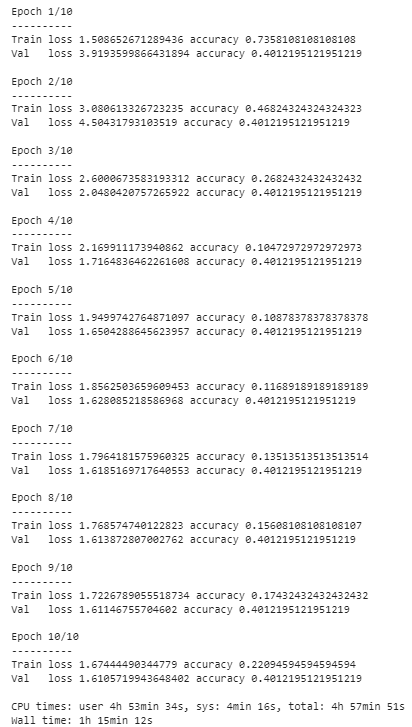

In [ ]:
plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')

plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

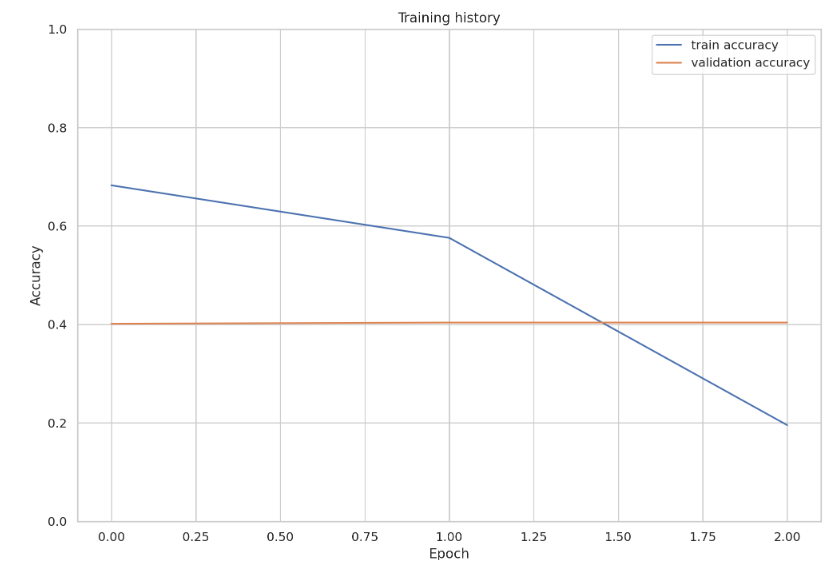

In [ ]:
model.load_state_dict(
    torch.load(
        "drive/My Drive/best_model_state.bin",
        map_location=torch.device("cpu"),
    )
)

image.png

In [ ]:
test_acc, _ = eval_model(model, test_data_loader, loss_fn, device, len(df_test))

test_acc.item()

image.png

##  Converts list of predictions, probabilities, and real values into PyTorch sensors.

In [ ]:
def get_predictions(model, data_loader):
    model = model.eval()

    review_texts = []
    predictions = []
    prediction_probs = []
    real_values = []

    with torch.no_grad():
        for d in data_loader:
            ## create instances on GPU
            texts = d["review_text"]
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs, dim=1) ##Extract predicted class

            probs = F.softmax(outputs, dim=1) ## compute class probabilities

            review_texts.extend(texts)
            predictions.extend(preds)
            prediction_probs.extend(probs)
            real_values.extend(targets)

    predictions = torch.stack(predictions).cpu()
    prediction_probs = torch.stack(prediction_probs).cpu()
    real_values = torch.stack(real_values).cpu()
    return review_texts, predictions, prediction_probs, real_values

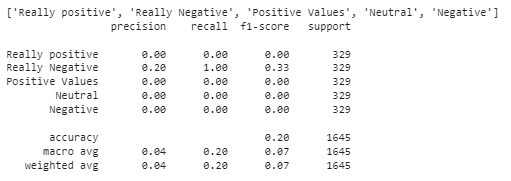

In [ ]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(model, test_data_loader)

In [ ]:
# print(class_names)
# print(y_test)
# print(y_pred)
# print(classification_report(y_test, y_pred, target_names=class_names))

label_to_name = {0: 'Really positive', 1: 'Really Negative', 2: 'Positive Values', 3:'Neutral', 4:'Negative'}

# If you need to construct class_names based on unique labels found in y_test/y_pred
unique_labels = np.unique(np.concatenate((y_test.cpu().numpy(), y_pred.cpu().numpy())))
class_names = [label_to_name[label] for label in unique_labels]

print(class_names)
y_pred_np = y_pred.numpy()

# If y_pred is on the GPU
y_pred_np = y_pred.cpu().numpy()
y_test_np = y_test.cpu().numpy() if y_test.is_cuda else y_test.numpy()

# Now, call classification_report with the numpy version of y_pred
print(classification_report(y_test_np, y_pred_np, target_names=class_names))
report = classification_report(y_test_np, y_pred_np, target_names=class_names , output_dict= True)

In [ ]:
report_df = pd.DataFrame(report).transpose()

# Drop the 'support' column if not needed for the plot
report_df.drop(columns='support', inplace=True, errors='ignore')

# Drop the 'accuracy' row since it's an overall metric, not per class
report_df = report_df.drop('accuracy', errors='ignore')

sns.set(style="whitegrid")

# Plotting
report_df.plot(kind='bar', figsize=(10, 7))
plt.title('Classification Report')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

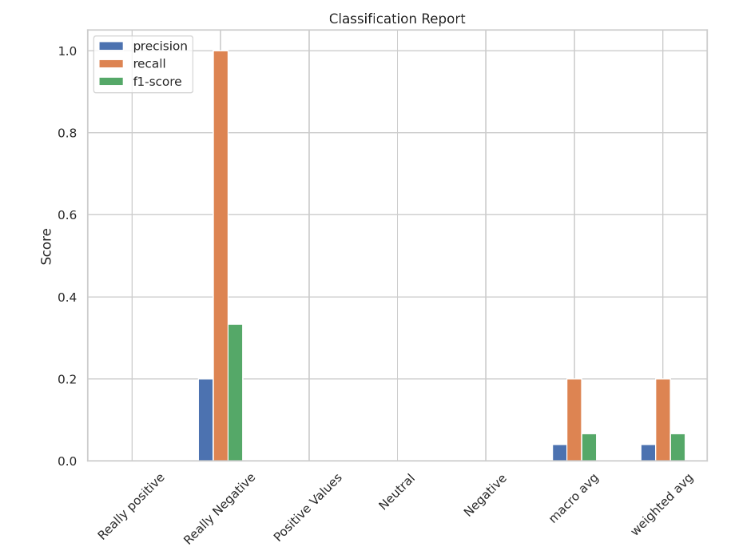

In [ ]:
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha="right")
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha="right")
    plt.ylabel("True sentiment")
    plt.xlabel("Predicted sentiment")


cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

## Confusion matrix, seems to indicate perhaps an error in the data,but other observations seem to indicate it is working as it should just not optimally

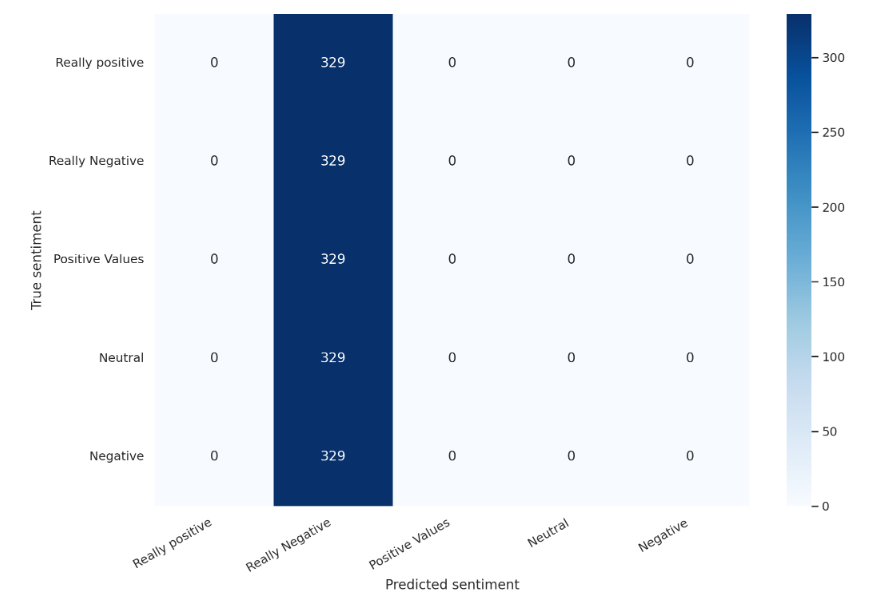

In [ ]:
idx = 2

review_text = y_review_texts[idx]
true_sentiment = y_test[idx]
pred_df = pd.DataFrame({"class_names": class_names, "values": y_pred_probs[idx]})

In [ ]:
from textwrap import wrap
print("\n".join(wrap(review_text)))
print()
print(f"True sentiment: {class_names[true_sentiment]}")

image.png

In [ ]:
sns.barplot(x="values", y="class_names", data=pred_df, orient="h")
plt.ylabel("sentiment")
plt.xlabel("probability")
plt.xlim([0, 1])

## Probability of each outcome distribution

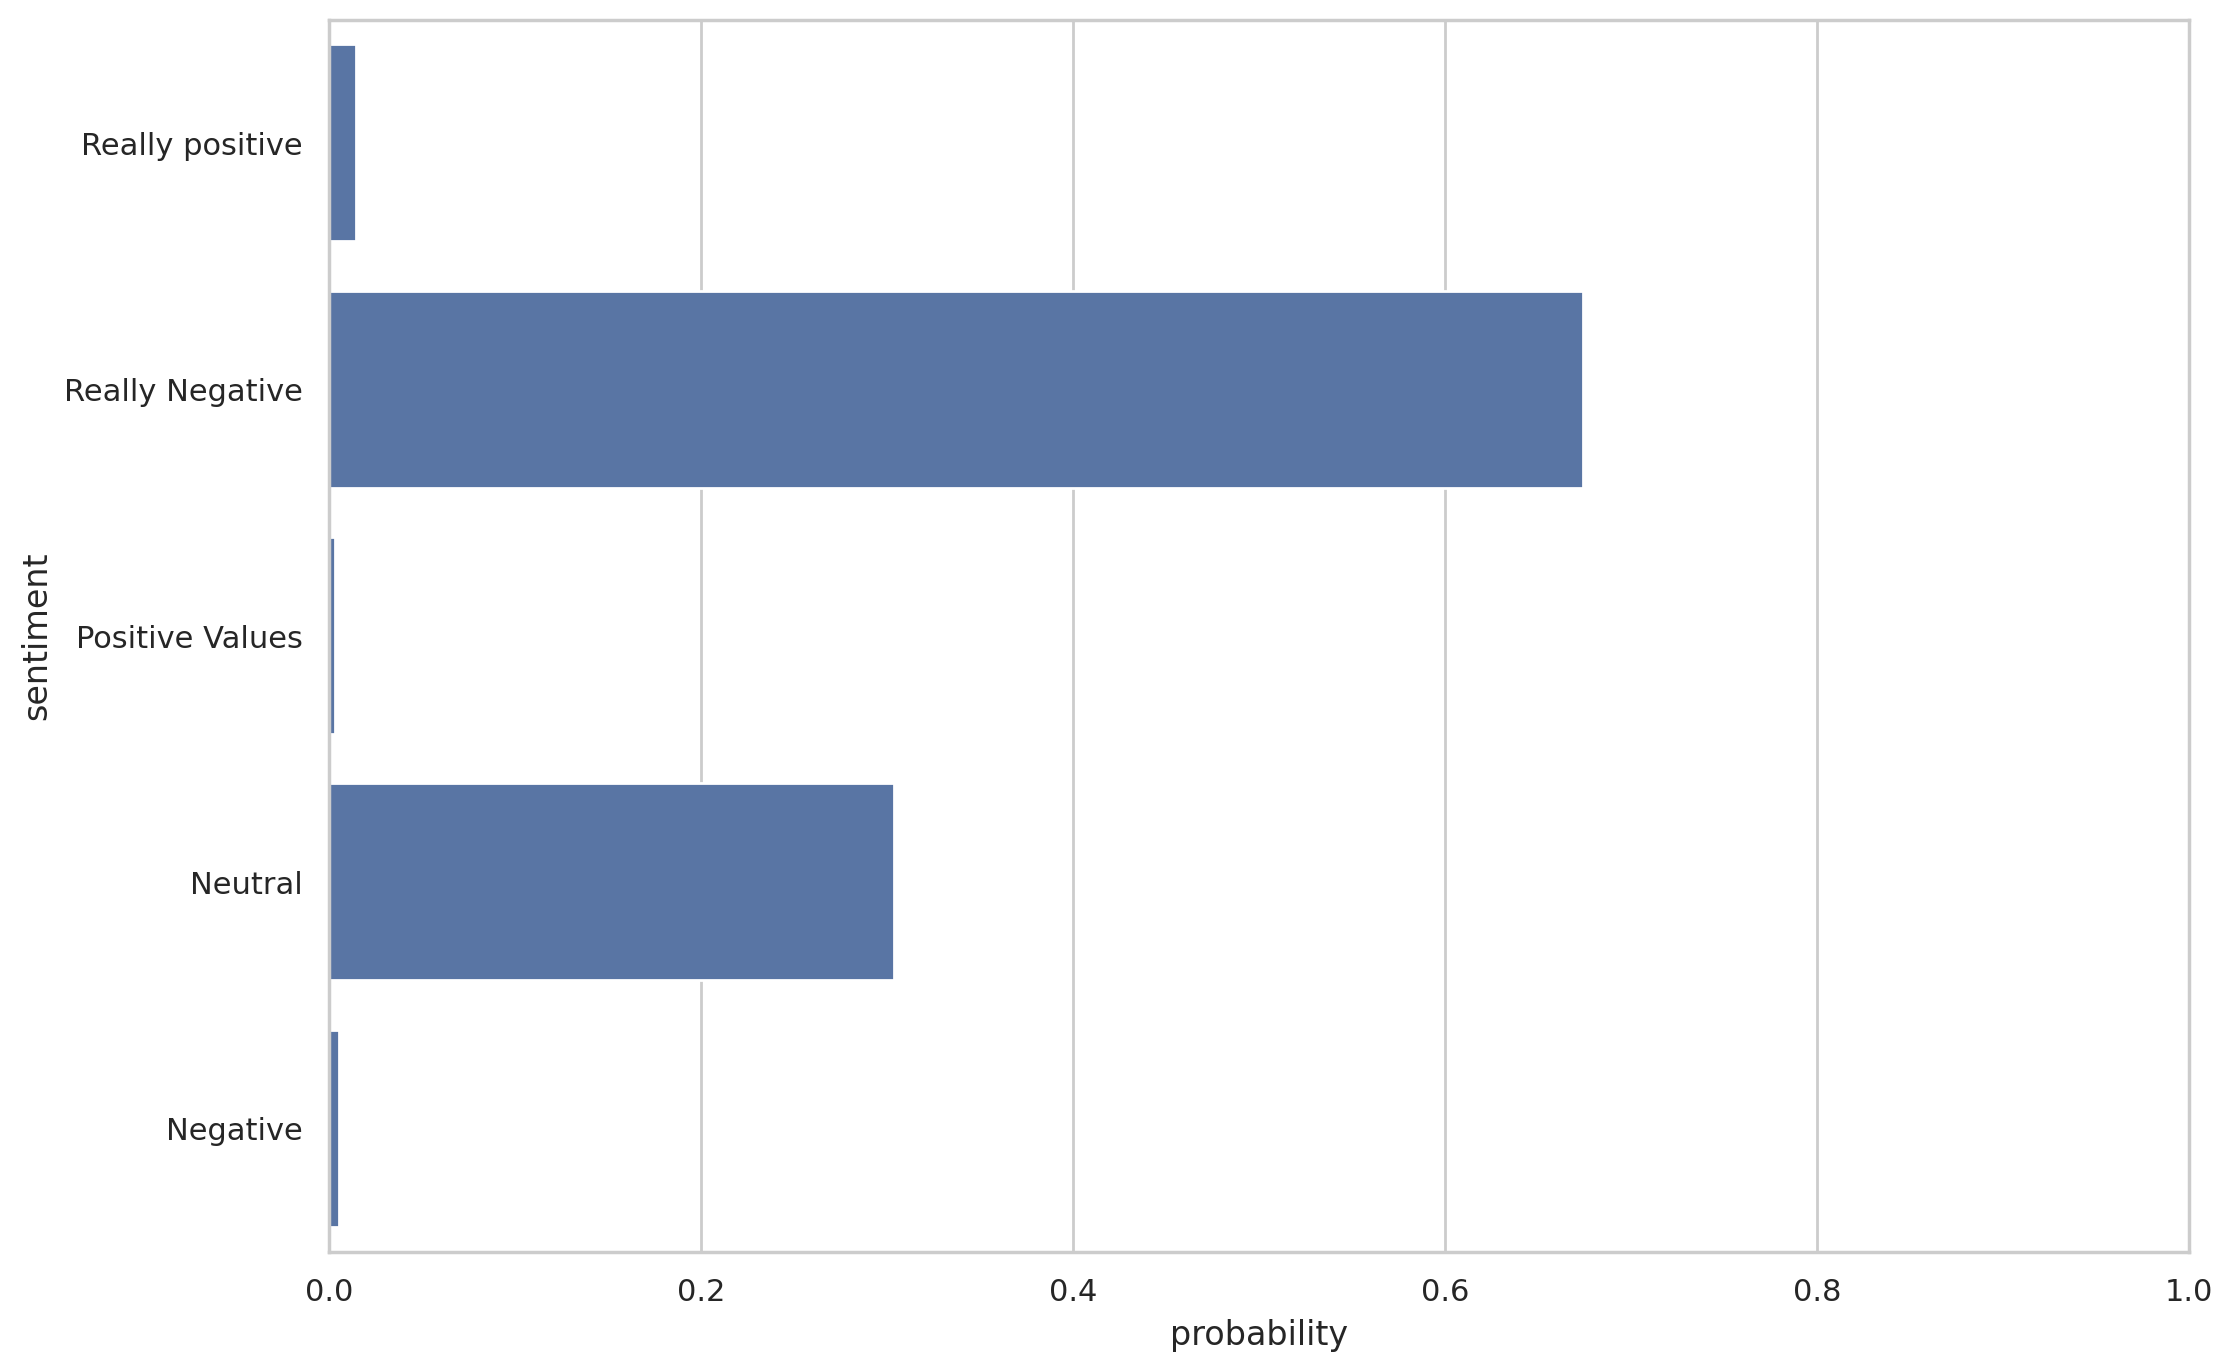

In [ ]:
review_text = "However , the rapidly increasing costs and the strengthening of the euro were challenging for the whole industry , and they impacted on our results."

In [ ]:
encoded_review = tokenizer.encode_plus(
    string1,
    max_length=MAX_LEN,
    add_special_tokens=True,
    return_token_type_ids=False,
    pad_to_max_length=True,
    return_attention_mask=True,
    return_tensors="pt",
)

In [ ]:

input_ids = encoded_review["input_ids"].to(device)
attention_mask = encoded_review["attention_mask"].to(device)

output = model(input_ids, attention_mask)
_, prediction = torch.max(output, dim=1)

print(f"Review text: {string1}")
print(f"Sentiment  : {class_names[prediction]}")

## Accurate prediction of sentiment, more testing needs to be done.

image.png